Sinh Viên: Phạm Đức Thể - Trần Triệu Vũ - Mai Đức Thuận

MSSV: 19522253 - 19522539 - 19522316

Lớp: DS105.M11

Final Project - 20/10/2021

Đề tài: **PHÂN TÍCH DỮ LIỆU KHẢO SÁT HỌC MÁY VÀ KHOA HỌC DỮ LIỆU CỦA KAGGLE 2021**

Bộ dữ liệu: [Kaggle Servey 2021](https://drive.google.com/drive/folders/1lLNp8gpf5tigK8eyweF5tGH29GixPVnx?usp=sharing)


# Final Project

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output 

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

In [2]:
path_data = '/content/drive/MyDrive/Dataset/kaggle_survey_2021_responses.csv'

In [3]:
df = pd.read_csv(path_data)

## Metadata

### Dạng file .txt

In [4]:
metadata = []
for i in range(df.shape[1]):
  s = str(i+1) + ' - ' + df.columns[i] + ' : ' + df.iloc[0, i] + ' ' + str(df.iloc[1:, i].unique())
  metadata.append(s)

In [5]:
for i in range(len(metadata)):
  metadata[i] = metadata[i].replace('\n', '')

In [6]:
d = pd.DataFrame(metadata)
d.to_csv('metadata.txt', sep='\n', index=False)

### Dạng file .csv, .xlsx

In [7]:
col_names = ['STT', 'Thuộc tính', 'Ý nghĩa', 'Miền giá trị']

In [8]:
STT = []
TT = []
YN = []
MGT = []

for i in range(df.shape[1]):
  STT.append(i+1)
  TT.append(df.columns[i])
  YN.append(df.iloc[0, i])
  MGT.append(str(df.iloc[1:, i].unique()).replace('\n', ''))

In [9]:
df_STT = pd.DataFrame(STT, columns=['STT'])
df_TT = pd.DataFrame(TT, columns=['Thuộc tính'])
df_YN = pd.DataFrame(YN, columns=['Ý nghĩa'])
df_MGT = pd.DataFrame(MGT, columns=['Miền giá trị'])

In [10]:
meta = pd.concat([df_STT, df_TT, df_YN, df_MGT], axis=1)

In [11]:
meta.to_excel('metadata.xlsx', index=False)
meta.to_csv('metadata.csv', index=False)

## Exploratory Data Analysis

In [12]:
df.drop(df.index[0], inplace=True)
df.head(5)

Time from Start to Finish (seconds)     Q1   Q2         Q3  \
1  910                                 50-54  Man  India       
2  784                                 50-54  Man  Indonesia   
3  924                                 22-24  Man  Pakistan    
4  575                                 45-49  Man  Mexico      
5  781                                 45-49  Man  India       

                  Q4                       Q5          Q6 Q7_Part_1 Q7_Part_2  \
1  Bachelor’s degree  Other                    5-10 years  Python    R          
2  Master’s degree    Program/Project Manager  20+ years   NaN       NaN        
3  Master’s degree    Software Engineer        1-3 years   Python    NaN        
4  Doctoral degree    Research Scientist       20+ years   Python    NaN        
5  Doctoral degree    Other                    < 1 years   Python    NaN        

  Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6 Q7_Part_7 Q7_Part_8 Q7_Part_9  \
1  NaN       NaN       NaN       NaN       NaN       NaN       NaN        
2  SQL       C         C++       Java      NaN       NaN       NaN        
3  NaN       NaN       C++       Java      NaN       NaN       NaN        
4  NaN       NaN       NaN       NaN       NaN       NaN       NaN        
5  NaN       C         NaN       NaN       NaN       NaN       NaN        

  Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER      Q8 Q9_Part_1 Q9_Part_2  \
1  NaN        NaN        NaN        NaN      Python  NaN       NaN        
2  NaN        NaN        NaN        NaN      Python  NaN       NaN        
3  NaN        NaN        NaN        NaN      Python  NaN       NaN        
4  NaN        NaN        NaN        NaN      Python  NaN       NaN        
5  NaN        MATLAB     NaN        NaN      Python  NaN       NaN        

  Q9_Part_3 Q9_Part_4  Q9_Part_5   Q9_Part_6      Q9_Part_7 Q9_Part_8  \
1  NaN       NaN       NaN        NaN         NaN            NaN        
2  NaN       NaN       NaN        NaN           Notepad++    NaN        
3  NaN       NaN        PyCharm   NaN         NaN            NaN        
4  NaN       NaN       NaN          Spyder    NaN            NaN        
5  NaN       NaN       NaN          Spyder    NaN            NaN        

         Q9_Part_9 Q9_Part_10         Q9_Part_11 Q9_Part_12 Q9_OTHER  \
1    Vim / Emacs    NaN        NaN                NaN        NaN       
2  NaN              NaN         Jupyter Notebook  NaN        NaN       
3  NaN              NaN         Jupyter Notebook  NaN        Other     
4  NaN              NaN         Jupyter Notebook  NaN        NaN       
5  NaN               MATLAB     Jupyter Notebook  NaN        NaN       

          Q10_Part_1       Q10_Part_2 Q10_Part_3 Q10_Part_4 Q10_Part_5  \
1  NaN                Colab Notebooks  NaN        NaN        NaN         
2   Kaggle Notebooks  Colab Notebooks  NaN        NaN        NaN         
3   Kaggle Notebooks  NaN              NaN        NaN        NaN         
4  NaN                Colab Notebooks  NaN        NaN        NaN         
5  NaN                NaN              NaN        NaN        NaN         

  Q10_Part_6 Q10_Part_7 Q10_Part_8 Q10_Part_9 Q10_Part_10  \
1  NaN        NaN        NaN        NaN        NaN          
2  NaN        NaN        NaN        NaN        NaN          
3  NaN        NaN        NaN        NaN        NaN          
4  NaN        NaN        NaN        NaN        NaN          
5  NaN        NaN        NaN        NaN        NaN          

            Q10_Part_11 Q10_Part_12 Q10_Part_13 Q10_Part_14 Q10_Part_15  \
1  NaN                   NaN         NaN         NaN         NaN          
2  NaN                   NaN         NaN         NaN         NaN          
3  NaN                   NaN         NaN         NaN         NaN          
4  NaN                   NaN         NaN         NaN         NaN          
5  Google Cloud Datalab  NaN         NaN         NaN         NaN          

  Q10_Part_16 Q10_OTHER  \
1  NaN         NaN        
2  NaN         NaN        
3  NaN      

In [13]:
df.info()
print('Dataset có {} samples và {} features'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.3+ MB
Dataset có 25973 samples và 369 features


**Nhận xét**:
- Bộ dữ liệu có kích thước khá lớn $73.3$ MB.
- Dataset có $25973$ samples và $369$ features.
- Toàn bộ các features của dataset đều có kiểu dữ liệu là **object**.

### EDA từng thuộc tính

#### Q1. 
Bạn bao nhiêu tuổi?

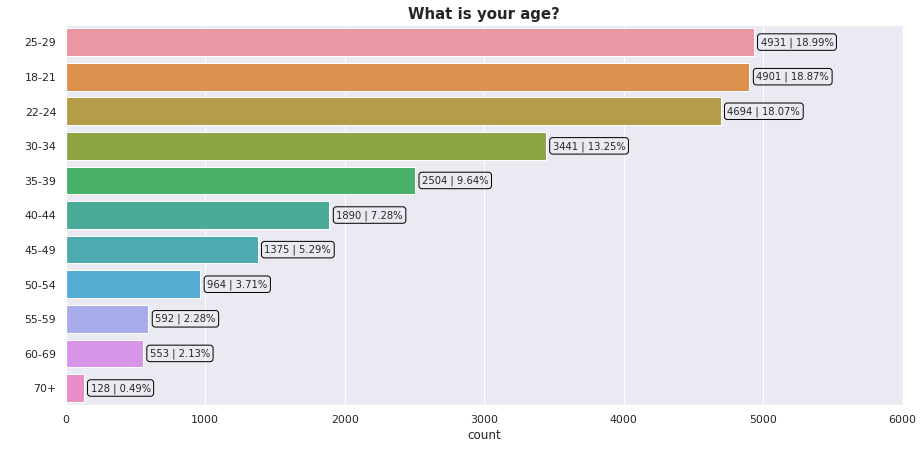

In [14]:
plt.figure(figsize=(15,7))
splot = sns.countplot(y='Q1', data=df, 
                      order = df['Q1'].value_counts().index)
total = df[['Q1']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))


plt.xlim(0,6000)
plt.ylabel(' ')
plt.title('What is your age?',fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Hầu hết người khảo sát có độ tuổi nằm trong khoảng từ $18-29$ tuổi (chiếm $55.93\%$ tổng số người tham gia khảo sát).
-	Độ tuổi càng cao thì số lượng càng giảm.

#### Q2. 
Giới tính của bạn là gì?

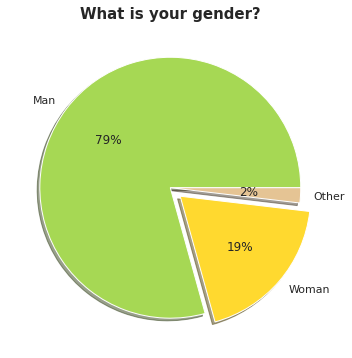

In [15]:
# Gọp các giá trị không rõ ràng với nhau thành một nhóm Other
df_2 = df['Q2'].value_counts().to_frame()
df_2.Q2[2] = df_2.Q2[2] + df_2.Q2[3] + df_2.Q2[4]
df_2.drop(index = ['Nonbinary', 'Prefer to self-describe'], inplace = True)

ax = sns.set(rc={'figure.figsize':(6,6)})
colors = sns.color_palette('Set2')[4:7]
explode = (0, 0.1, 0)
labels = ['Man', 'Woman', 'Other']
plt.pie(df_2['Q2'], labels = labels, explode=explode, colors = colors, autopct='%.0f%%', shadow=True)
plt.title('What is your gender?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Đa số người tham gia khảo sát là nam giới (chiếm $\sim80\%$ tổng số người tham gia khảo sát). Có thể do phụ nữ chưa tiếp cận nhiều với lĩnh vực này nên họ nghĩ lĩnh vực này không phù hợp với họ.

#### Q3. 
Bạn đang cư trú tại đất nước nào?

In [16]:
def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, column:rename_column}, axis='columns')
    return df

def plotly_choropleth_map(df, column, title, max_value):
    fig = px.choropleth(df, locations = 'country', 
                        color = column,
                        locationmode = 'country names', 
                        color_continuous_scale = 'viridis',
                        title = title,
                        range_color = [0, max_value])
    fig.update(layout=dict(title=dict(x=0.5)))
    fig.show()


responses_per_country_df = create_dataframe_of_counts(df,'Q3','country','# of respondents',return_percentages=False)
percentages_per_country_df = create_dataframe_of_counts(df,'Q3','country','% of respondents',return_percentages=True)

plotly_choropleth_map(responses_per_country_df, 
                       '# of respondents', 
                       'Total number of responses per country in 2021',
                        max_value = 1000)
plotly_choropleth_map(percentages_per_country_df, 
                      '% of respondents', 
                      'Percentage of total responses for most common countries in 2021',
                      max_value = 5)
print('Note that countries with less than 50 responses were replaced with the country name "other" (which does not show up on this map)')

Note that countries with less than 50 responses were replaced with the country name "other" (which does not show up on this map)


**Nhận xét:**
- Trong tổng số 66 quốc gia thì Mỹ, Ấn Độ là 2 nước có số lượng người tham gia cao nhất, kế đó là Nhật Bản và Trung Quốc. Nguyên nhân có thể vì các nước này có nền công nghệ được ưu tiên phát triển mạnh nên số người học tập nghiên cứu về lĩnh vực này nhiều hơn hẳn so với các quốc gia còn lại.

#### Q4.
Trình độ giáo dục chính quy cao nhất mà bạn đã đạt được hoặc dự định đạt được trong vòng 2 năm tới là gì?

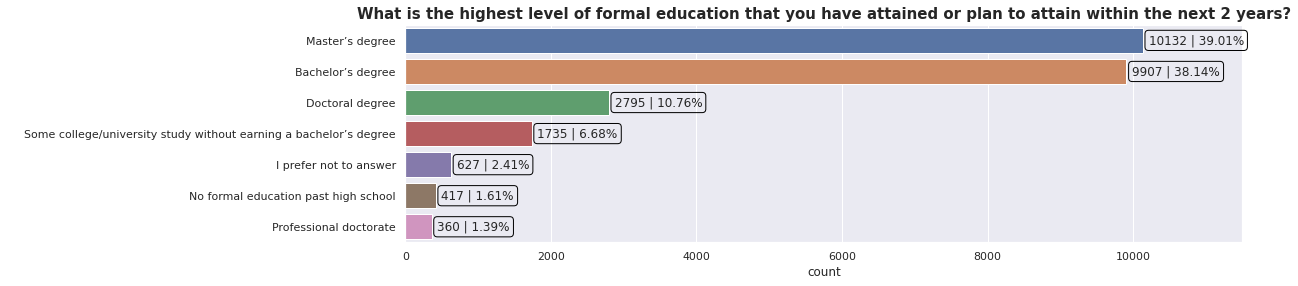

In [17]:
plt.figure(figsize=(15,4))
splot = sns.countplot(y='Q4', data=df,
                      order = df['Q4'].value_counts().index)

total = df[['Q4']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,11500)
plt.ylabel(' ')
plt.title('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Đa số người tham gia khảo sát có bằng Cử Nhân (`Bachelor's degree`) và Thạc Sĩ (`Master's degree`) (chiếm $77.15\%$ tổng số người tham gia khảo sát). Với phần lớn người tham gia ở [Q5](#q5) là sinh viên thì phần đông người tham gia sẽ là Cử Nhân là hoàn toàn hợp lý. Về bằng Thạc Sĩ, là phần đông các công việc khác cộng lại, họ đang học lên Thạc Sĩ hoặc đã đạt bằng Thạc Sĩ cũng là hợp lý.

#### Q5. <a name="q5" >
Chọn chức danh gần giống nhất với vai trò hiện tại của bạn (hoặc chức danh gần đây nhất nếu đã nghỉ hưu)

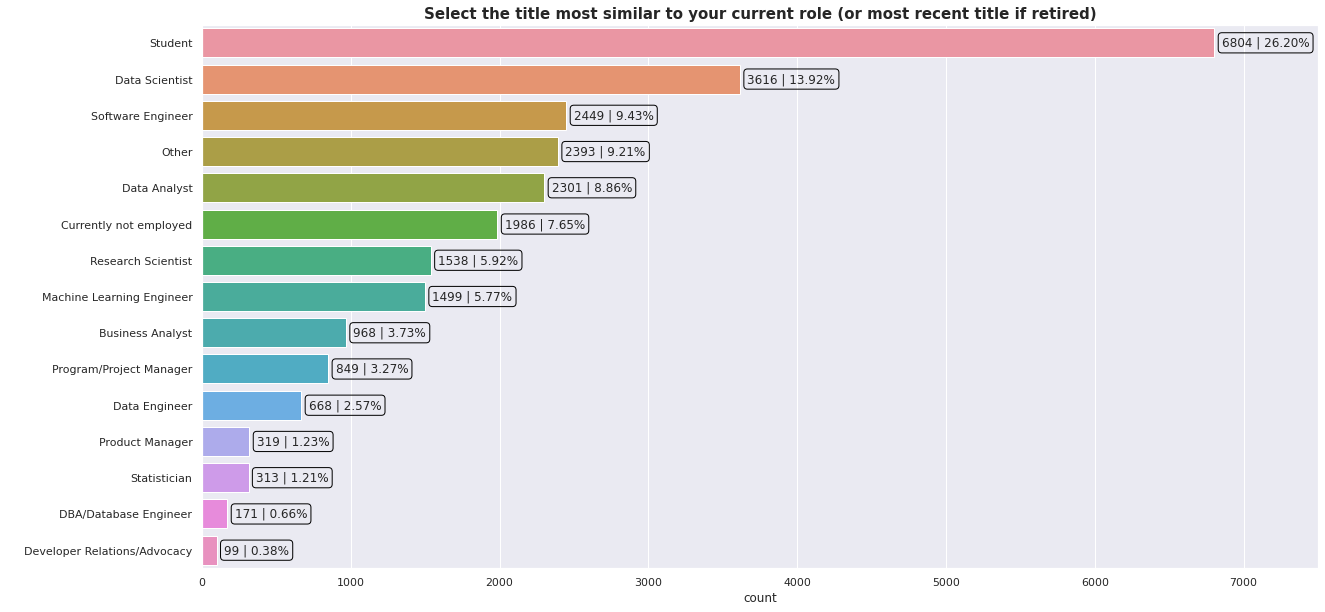

In [18]:
plt.figure(figsize=(20,10))
splot = sns.countplot(y='Q5', data=df, 
                      order = df['Q5'].value_counts().index)

total = df[['Q5']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,7500)
plt.ylabel(' ')
plt.title('Select the title most similar to your current role (or most recent title if retired)', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người khảo sát là sinh viên (`Student`) (chiếm $26.20\%$). Xếp thứ 2 là nhà khoa học dữ liệu (`Data Scientist`) (Chiếm $13.92\%$).

#### Q6. <a name = "q6">
Bạn đã viết mã và / hoặc lập trình được bao nhiêu năm rồi?

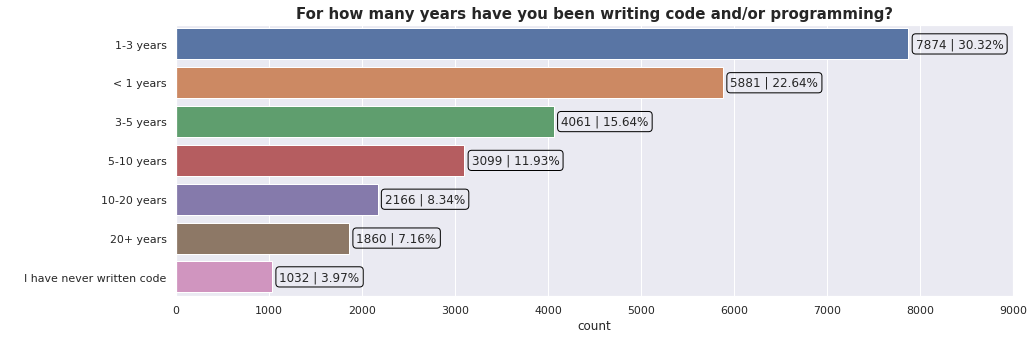

In [19]:
plt.figure(figsize=(15,5))
splot = sns.countplot(y='Q6', data=df,
                      order = df['Q6'].value_counts().index)

total = df[['Q6']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,9000)
plt.ylabel(' ')
plt.title('For how many years have you been writing code and/or programming?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Đa số người khảo sát có kinh nghiệm viết code < 3 năm (chiếm $52.96\%$). Kết quả câu hỏi này cũng chịu sự tác động từ phần lớn sinh viên nên thời gian tiếp xúc với lập trình của họ là 0-3 năm.
- `I have never written code` có số lượng là $1032$ chiếm $4\%$ số lượng người khảo sát. Liệu rằng có gì đặt biệt ở đây không? Tại sao làm trong lĩnh vực công nghệ DS, ML mà lại chưa từng viết code? Để tìm hiểu vấn đề này em sẽ kết hợp [Q5 & Q6](#q1q4q5q6) để xem những người này sẽ làm việc ở vị trí nào.

#### Q7. <a name = "q7">
Bạn sử dụng ngôn ngữ lập trình nào thường xuyên?

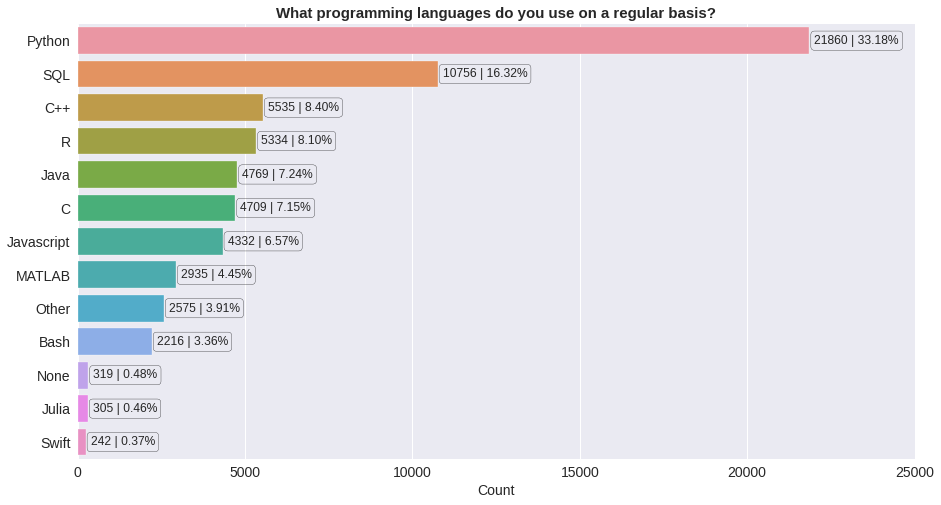

In [20]:
#preparing the data
df_q7 = df[[i for i in df.columns if 'Q7' in i]]
df_q7_all = pd.Series(dtype='int')
for i in df_q7.columns:
    df_q7_all[df_q7[i].value_counts().index[0]] = df_q7[i].count()

df_q7_all = df_q7_all.sort_values(ascending=False)
#ploting the graph
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
splot = sns.barplot(x = df_q7_all.values ,y = df_q7_all.index)

total = df_q7_all.values.sum()
#add annotation to each bar
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,25000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.title('What programming languages do you use on a regular basis?',fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Số người sử dụng ngôn ngữ `Python` chiếm cao nhất trong khảo sát ($33.18\%$). Nguyên nhân cũng dễ hiểu, vì là khảo sát trong lĩnh vực DS, ML nên ngôn ngữ `Python` hỗ trợ rất mạnh trong lĩnh vực này nên mọi người sẽ thường xuyên code bằng ngôn ngữ `Python`, dẫn đến số lượt bình chọn ngôn ngữ này là cao nhất.

- Xếp ở vị trí thứ 2 là `SQL` (chiếm $16.32\%$). Vì `SQL` là ngôn ngữ cơ sở dữ liệu, ngôn ngữ truy vấn mang tính cấu trúc. Nó được thiết kế để quản lý dữ liệu trong một hệ thống quản lý cơ sở dữ liệu quan hệ. Người khảo sát làm việc trong lĩnh vực DS nên sẽ thường xuyên thao tác với các cơ sở dữ liệu nên số lượt bình chọn cho ngôn ngữ này cũng khá cao.

- Xếp vị trí thứ 3 là `C++` vì có thể đây là ngôn ngữ cơ sở cho sinh viên học và hiểu rõ về lập trình.

- 2 ngôn ngữ lập trình được rất ít người tham gia khảo sát chọn ($<1\%$) đó là `Julia` và `Swift`. Câu hỏi đặt ra là vì sao lại thấp như vậy, có 2 giả thuyết đặt ra là: (i) 2 ngôn ngữ này không phù hợp với chuyên ngành ML&DS; (ii) chúng yêu cầu chuyên môn cao. để tìm câu trả lời cho 2 giả thuyết đã đặt ra này, chúng em tiến hành kết hợp các thuộc tính [Q4 & Q5 & Q7](#q4q5q7) lại với nhau.

#### Q8. 
Bạn muốn giới thiệu một nhà khoa học dữ liệu có tham vọng học ngôn ngữ lập trình nào trước tiên?

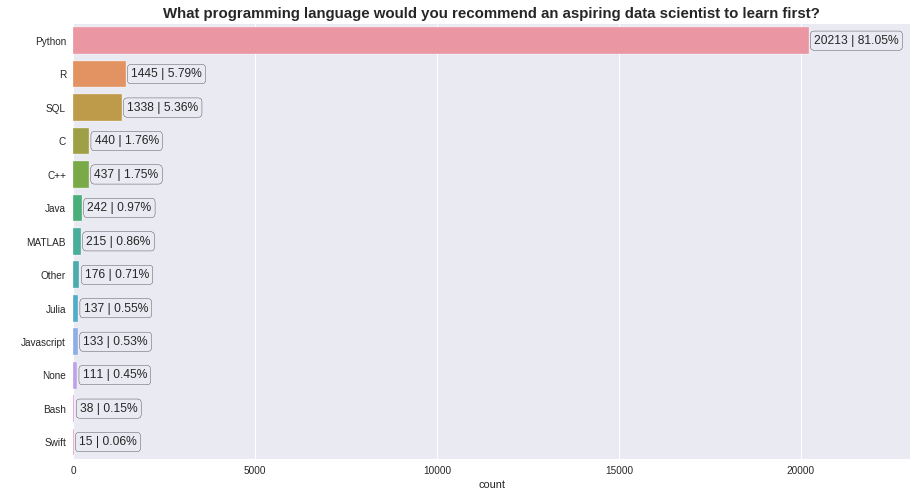

In [21]:
plt.figure(figsize=(15,8))
splot = sns.countplot(y='Q8', data=df,
                      order = df['Q8'].value_counts().index)

total = df[['Q8']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,23000)
plt.ylabel(' ')
plt.title('What programming language would you recommend an aspiring data scientist to learn first?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Số lượng người bình chọn cho `Python` là ngôn ngữ lập trình học đầu tiên chiếm rất cao ($81.05\%$, cao gấp 14 ngôn ngữ xếp vị trí thứ 2). Nguyên nhân có thể vì:
  + Ngôn ngữ `Python` dễ học, dễ hiểu, ngôn ngữ gần mới ngôn ngữ tự nhiên. Nên sẽ phù hợp với người mới bắt đầu.
  + Hầu hết người làm trong lĩnh vực ML&DS thì đều đã từng sử dụng `Python` cho học tập hoặc công việc nên ngôn ngữ này rất phổ biến đối với mọi người trong khảo sat nên mọi người bình chọn.

#### Q9. 
Bạn thường xuyên sử dụng môi trường phát triển tích hợp (IDE) nào sau đây?

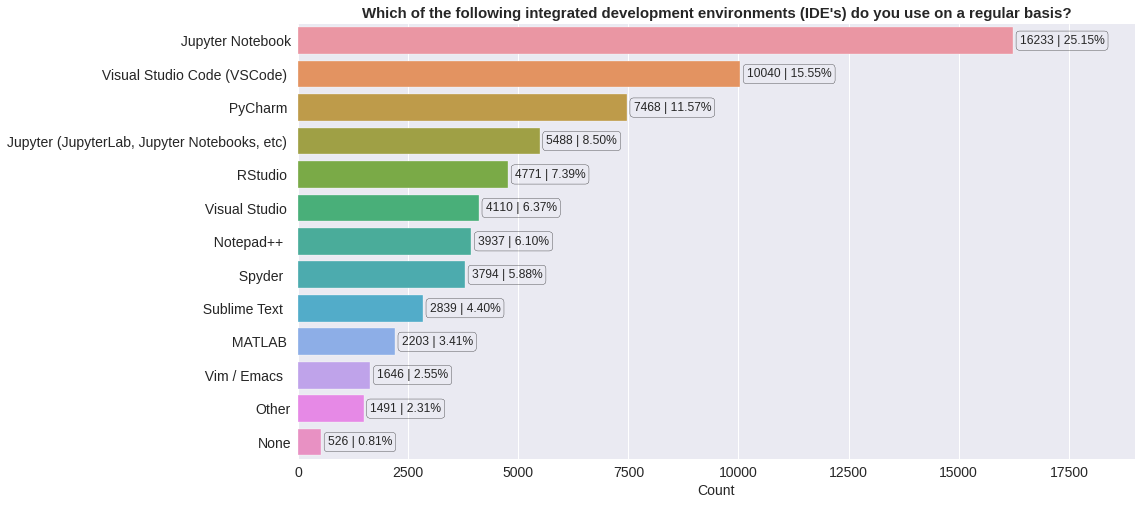

In [22]:
#preparing the data
df_q9 = df[[i for i in df.columns if 'Q9' in i]]
df_q9_all = pd.Series(dtype='int')
for i in df_q9.columns:
    df_q9_all[df_q9[i].value_counts().index[0]] = df_q9[i].count()

df_q9_all = df_q9_all.sort_values(ascending=False)
#ploting the graph
plt.style.use('seaborn')
plt.figure(figsize=(15,8))
splot = sns.barplot(x = df_q9_all.values ,y = df_q9_all.index)

#add annotation to each bar
total = df_q9_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,19000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
plt.title('Which of the following integrated development environments (IDE\'s) do you use on a regular basis?',fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Top 3 IDE được sử dụng thường xuyên là `Juputer Notebook`, `VSCode` và `PyCharm` (chiếm $52.27\%$). Trong đó `Jupyter Notebook` là cao nhất ($25.15\%$), theo em vì tính tiện lợi của `Jupyter Notebook` được hỗ trợ mạnh mẽ bởi các IDE online như Google Colab, Kaggle, IBM Watson Studio,… không cần phải cài trực tiếp xuống máy tính cá nhân nên sẽ thuận tiện cho mọi người và vì thế nó cũng sẽ phổ biến.

#### Q10. 
Bạn thường xuyên sử dụng sản phẩm notebook được lưu trữ nào sau đây?

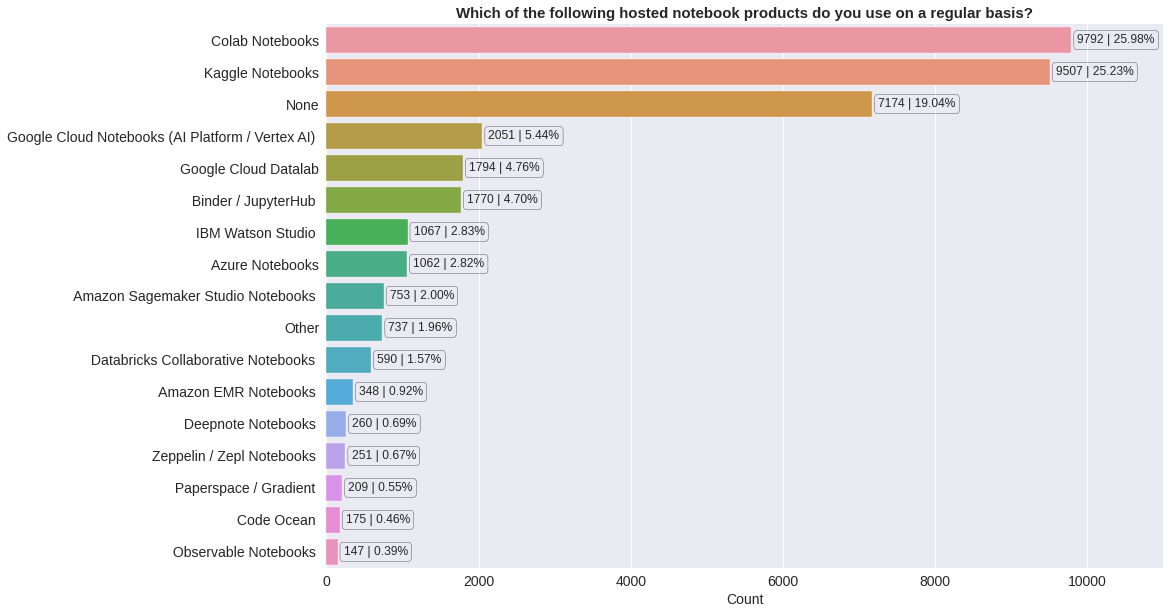

In [23]:
#preparing the data by compining the multible choice answers in one series
df_q10 = df[[i for i in df.columns if 'Q10' in i]]
df_q10_all = pd.Series(dtype='int')
for i in df_q10.columns:
    df_q10_all[df_q10[i].value_counts().index[0]] = df_q10[i].count()

df_q10_all = df_q10_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(15,10))
splot = sns.barplot(x = df_q10_all.values ,y = df_q10_all.index)

#add annotation to each bar
total = df_q10_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,11000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Which of the following hosted notebook products do you use on a regular basis?',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Sản phẩm notebook được sử dụng thường xuyện nhất là `Google Colab`, `Kaggle`. Có thể vì, hiện nay 2 nên tảng này support cho các dự án ML&DS mạnh mẽ nhất (có GPU free để training model nhưng có giới hạn thời gian sử dụng, với Colab Pro/Pro+ thì GPU có cấu hình mạnh mẽ và ít hạn chế về thời gian sử dụng GPU hơn mà giá thành cũng phải chăng).
- Ngoài ra còn có phần lớn người không sử dụng không sử dụng các sản phẩm notebook (tức là chọn `None`). Có thể những người này thích sử dụng các IDE khác hoặc là sử dụng trực tiếp trên laptop các nhân mà không sử dụng các notebook online.

#### Q11. 
Bạn sử dụng loại nền tảng máy tính nào thường xuyên nhất cho các dự án khoa học dữ liệu của mình?

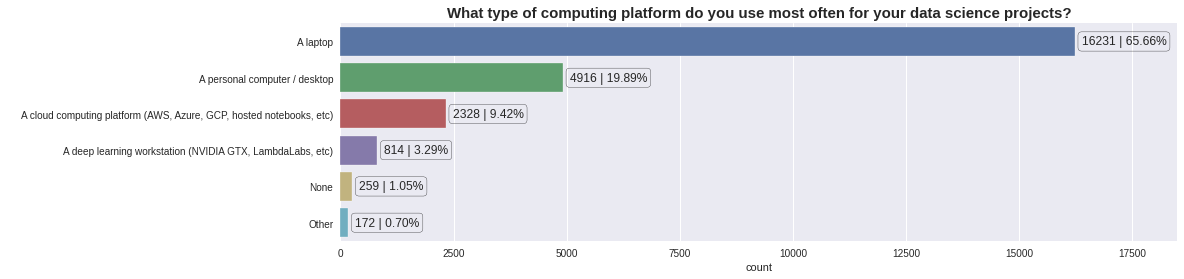

In [24]:
plt.figure(figsize=(15,4))
splot = sns.countplot(y='Q11', data=df,
                      order = df['Q11'].value_counts().index)

total = df[['Q11']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,18500)
plt.ylabel(' ')
plt.title('What type of computing platform do you use most often for your data science projects?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Phần lớn người khảo sát chọn `laptop` là nền tảng sử dụng cho các dự án khoa học dữ liệu (chiếm $65.66\%$). Theo em vì tính tiện lợi, nhỏ gọn và phổ biến của `laptop` nên hầu hết ai cũng sẽ sở hữu cho mình 1 chiếc `laptop`, thêm vào đó cấu hình của `laptop` hiện nay cũng khá mạnh và có thể đáp ứng hầu hết nhu cầu của người sử dụng cho các dự án khoa học dữ liệu nên `laptop` chiếm tỉ lệ cao.

#### Q12. <a name="q12" >
Bạn thường xuyên sử dụng những loại phần cứng chuyên dụng nào?

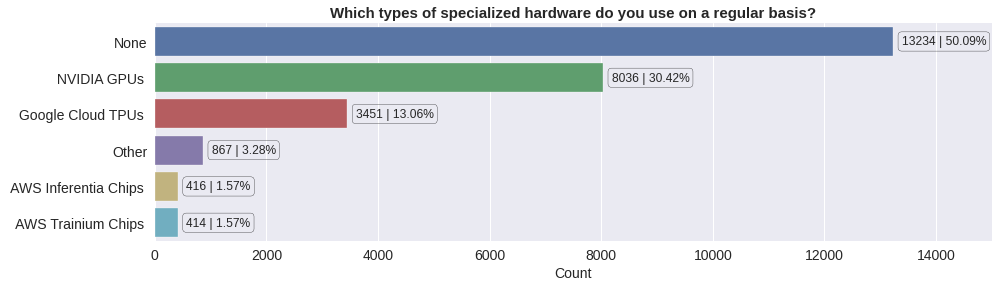

In [25]:
#preparing the data by compining the multible choice answers in one series
df_q12 = df[[i for i in df.columns if 'Q12' in i]]
df_q12_all = pd.Series(dtype='int')
for i in df_q12.columns:
    df_q12_all[df_q12[i].value_counts().index[0]] = df_q12[i].count()

df_q12_all = df_q12_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(15,4))
splot = sns.barplot(x = df_q12_all.values ,y = df_q12_all.index)

#add annotation to each bar
total = df_q12_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,15000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Which types of specialized hardware do you use on a regular basis?',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Hơn $50\%$ người bình chọn là `None` (tức là không sử dụng phần cứng chuyên dụng nào) và $30\%$ người bình chọn `NVIDIA GPUs` (sử dụng phần cứng chuyên dụng là GPU). Số lượng bình chọn `None` cao vó thể vì giá của các phần cứng chuyên dụng như GPU hiện nay đang rất đắt đỏ, thâm chí còn không có hàng, nên việc mua và sử dụng cũng khá khó khăn.

#### Q13. 
Bạn đã sử dụng TPU (tensor processing unit) khoảng bao nhiêu lần?

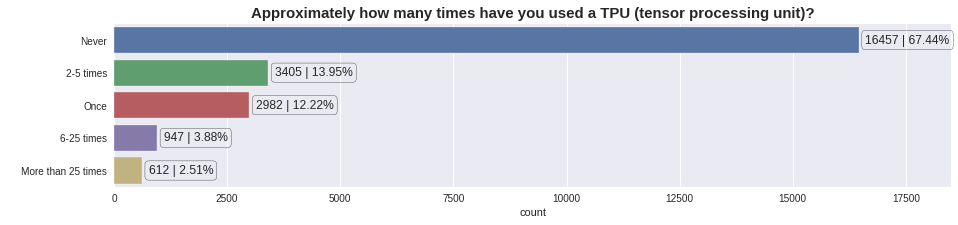

In [26]:
plt.figure(figsize=(15,3))
splot = sns.countplot(y='Q13', data=df,
                      order = df['Q13'].value_counts().index)

total = df[['Q13']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,18500)
plt.ylabel(' ')
plt.title('Approximately how many times have you used a TPU (tensor processing unit)?',fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người tham gia khảo sát chưa từng sử dụng TPU (tức là chọn `Never`, chiếm $67.44\%$). Theo em, có thể là vì loại phần cứng chuyên dụng này còn khá mới mẻ, chưa tính toán hiệu quả, tương thích tốt với các mô hình hiện nay như khi sử dụng GPU. Ngoài ra, ở [Q12](#q12) thì ta cũng thấy số người có sử dụng TPU chiếm tỉ lệ cũng khá thấp. Từ đó dẫn đến số người chưa từng sử dụng TPU cao.

#### Q14. 
Bạn thường xuyên sử dụng thư viện hoặc công cụ trực quan hóa dữ liệu nào?

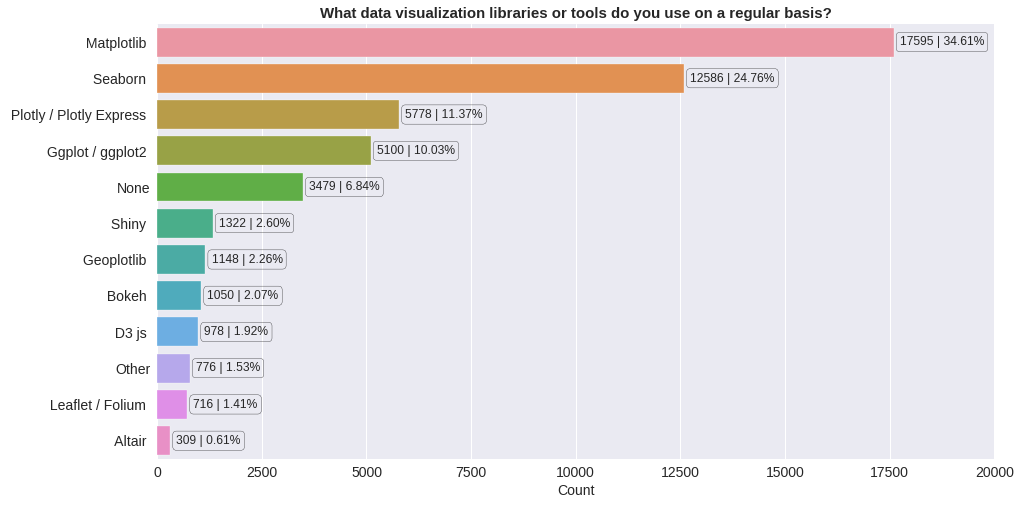

In [27]:
#preparing the data by compining the multible choice answers in one series
df_q14 = df[[i for i in df.columns if 'Q14' in i]]
df_q14_all = pd.Series(dtype='int')
for i in df_q14.columns:
    df_q14_all[df_q14[i].value_counts().index[0]] = df_q14[i].count()

df_q14_all = df_q14_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(15,8))
splot = sns.barplot(x = df_q14_all.values ,y = df_q14_all.index)

#add annotation to each bar
total = df_q14_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,20000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('What data visualization libraries or tools do you use on a regular basis?',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Hai thư viện được sử dụng nhiều nhất để trực quan hóa dữ liệu là `Matplotlib` (chiếm $34.61\%$) và `Seaborn` (chiếm $24.76%\$). Theo em nguyên nhân 2 thư viện này chiến đa số là vì nó được sử dụng phổ biến trong ngôn ngữ lập trình Python và hầu hết người khảo sát đều thường xuyên sử dụng ngôn ngữ lập trình Python ([Q7](#q7)) nên hai thư viện này cũng sẽ được sử dụng thường xuyên để trực quan hóa dữ liệu.

#### Q15. <a name = "q15">
Bạn đã sử dụng phương pháp học máy trong bao nhiêu năm?

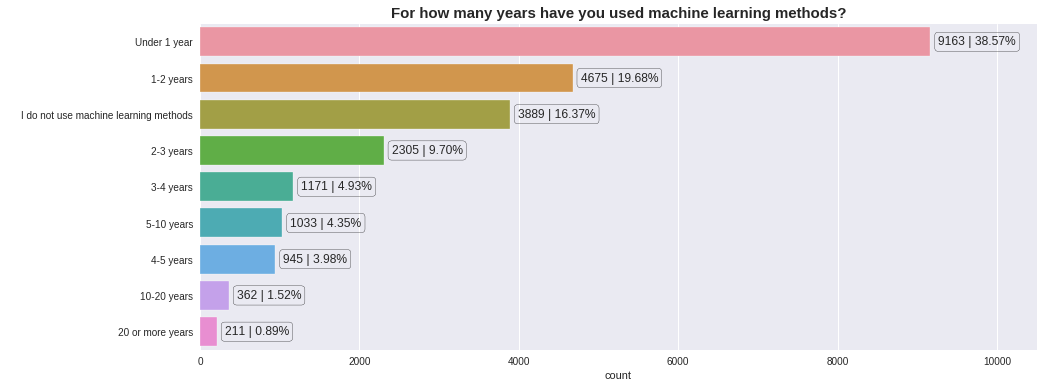

In [28]:
plt.figure(figsize=(15,6))
splot = sns.countplot(y='Q15', data=df, 
                      order = df['Q15'].value_counts().index)

total = df[['Q15']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 100
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,10500)
plt.ylabel(' ')
plt.title('For how many years have you used machine learning methods?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Hầu hết người khảo sát có kinh nghiệm sử dụng các phương pháp học máy < 2 năm (chiếm $58.25\%$). Tuy nhiêu, ở đây ta thấy có tới $16.37\%$ người chưa từng sử dụng các phương máy học máy (Tại sao?). Em đặt ra 2 giả thuyết là (1) vì những người này chủ yếu là sinh viên mới vào đại học chưa được tiếp cận nhiều với các chuyên ngành, (2) là người làm trong lĩnh vực không cần sừ dụng các phương pháp học máy. Để trả lời cho câu hỏi này em tiến hành kết hợp [Q5 & Q15](#q5q15) lại để kiểm tra xem giả thuyết có đúng hay không.

#### Q16. 
Bạn sử dụng frameworks máy học nào sau đây thường xuyên?

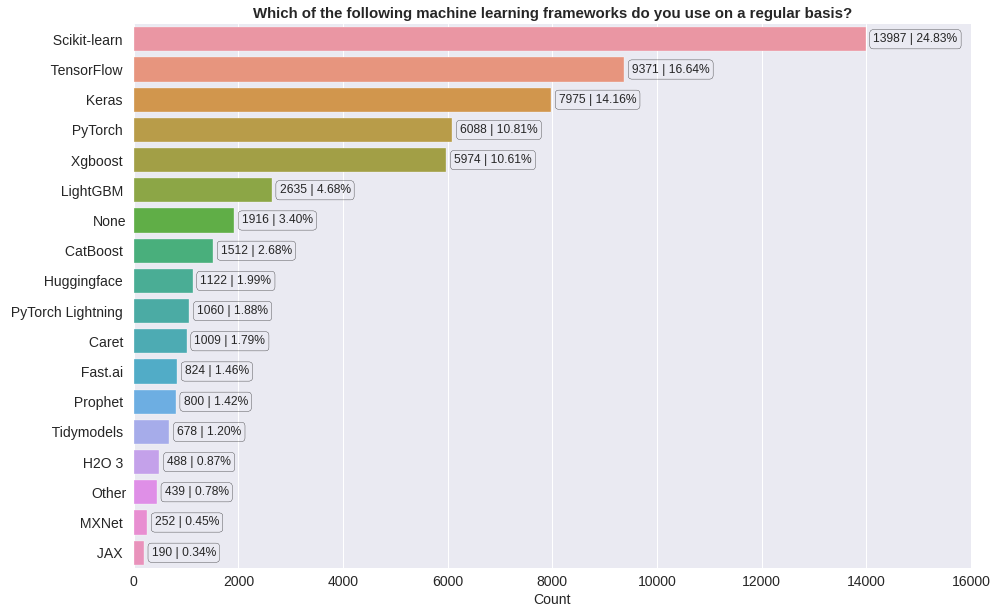

In [29]:
#preparing the data to compine the results from the multible choice answers
df_q16 = df[[i for i in df.columns if 'Q16' in i]]
df_q16_all = pd.Series(dtype='int')
for i in df_q16.columns:
    df_q16_all[df_q16[i].value_counts().index[0]] = df_q16[i].count()

df_q16_all = df_q16_all.sort_values(ascending=False)
#ploting the graph
plt.figure(figsize=(15,10))

splot = sns.barplot(x = df_q16_all.values ,y = df_q16_all.index)

#add annotation to each bar
total = df_q16_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,16000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Which of the following machine learning frameworks do you use on a regular basis?',fontsize=15,weight='bold')
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 frameworks được sử dụng thường xuyên là `Scikit-learn` (chiếm $24.83\%$), `TensorFlow` (chiếm $16.64\%$), `Keras` (chiếm $14.16\%$). Hiện nay 3 frameworks này cũng được sử dụng rất phổ biến trong ngôn ngữ lập trình Python nên nó được nhiều người bình chọn.

#### Q17. 
Bạn sử dụng thuật toán ML nào sau đây một cách thường xuyên?

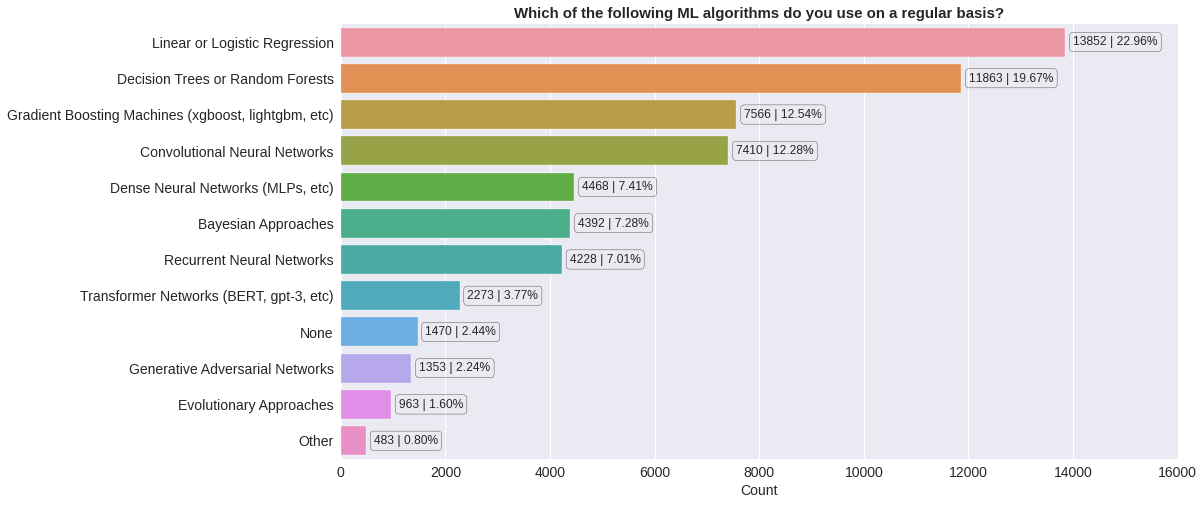

In [30]:
#preparing the data
df_q17 = df[[i for i in df.columns if 'Q17' in i]]
df_q17_all = pd.Series(dtype='int')
for i in df_q17.columns:
    df_q17_all[df_q17[i].value_counts().index[0]] = df_q17[i].count()

df_q17_all = df_q17_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q17_all.values ,y = df_q17_all.index)

#add annotation to each bar
total = df_q17_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 150
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,16000)
plt.title('Which of the following ML algorithms do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- 2 nhóm thuật toán ML được bình chọn nhiều nhất `Linear or Logistic Regression` (chiếm $22.96\%$) và `Decision Trees or Random Forests` (chiếm $19.67\%$). Vì 2 nhóm thuật toán này là cơ bản và rất phổ biến trong ML nên khi mới bắt đầu học ML chắc chản ai cũng phải từng học qua nên sẽ được bình chọn cao, còn các thuật toán còn lại thì tùy theo từng chuyên ngành sẽ học và ứng dụng nên ít phổ biến hơn 2 nhóm thuật toán trên nên sẽ được bình chọn ít hơn.

#### Q18. 
Bạn thường xuyên sử dụng những phương pháp thị giác máy tính nào?

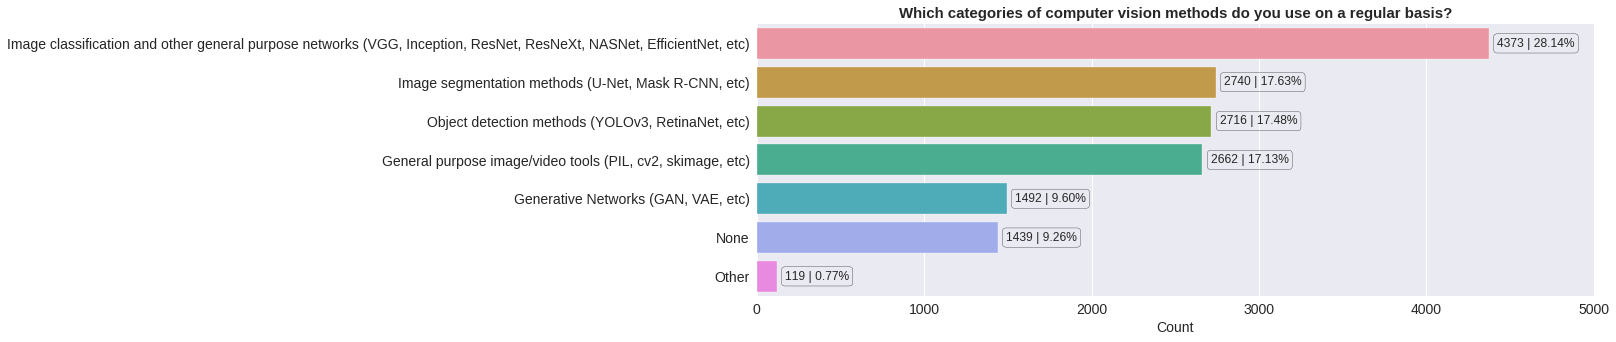

In [31]:
#preparing the data
df_q18 = df[[i for i in df.columns if 'Q18' in i]]
df_q18_all = pd.Series(dtype='int')
for i in df_q18.columns:
    df_q18_all[df_q18[i].value_counts().index[0]] = df_q18[i].count()

df_q18_all = df_q18_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q18_all.values ,y = df_q18_all.index)

#add annotation to each bar
total = df_q18_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5000)
plt.title('Which categories of computer vision methods do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phương pháp được sử dụng thường xuyên nhất trong lĩnh vực Thị giác máy tính (Computer Vision) là `Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)` (chiếm $28.14\%$). Vì đây là các bài toán và phương pháp cơ bản trong lĩnh vực Thị giác máy tính nên khi theo lĩnh vực này thì đa số mọi người đều sẽ biết đến phương pháp này nên tính phổ biến sẽ cao $=>$ số lược bình chọn sẽ cao hơn. Các phương pháp còn lại thì khá khó và mới phát triển gần đây (`GAN`) nên tính phổ biến sẽ không cao $=>$ sẽ ít người bình chon.

#### Q19. 
Bạn sử dụng phương pháp xử lý ngôn ngữ tự nhiên (NLP) nào sau đây một cách thường xuyên?

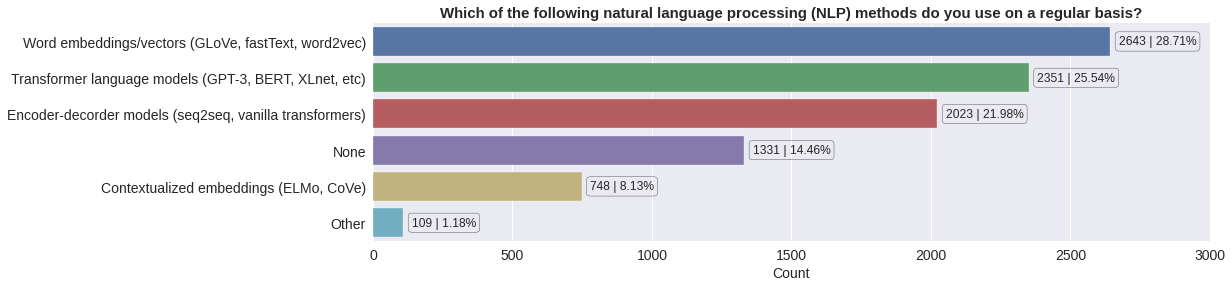

In [32]:
#preparing the data
df_q19 = df[[i for i in df.columns if 'Q19' in i]]
df_q19_all = pd.Series(dtype='int')
for i in df_q19.columns:
    df_q19_all[df_q19[i].value_counts().index[0]] = df_q19[i].count()

df_q19_all = df_q19_all.sort_values(ascending=False)
plt.figure(figsize=(15,4))

splot = sns.barplot(x = df_q19_all.values ,y = df_q19_all.index)

#add annotation to each bar
total = df_q19_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,3000)
plt.title('Which of the following natural language processing (NLP) methods do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 phương pháp được sử dụng thưởng xuyên trong Xử lý ngôn ngữ tự nhiên (Natural Language Processing - NLP) là `Word embeddings/vectors (GLoVe, fastText, word2vec)` (chiếm $28.71\%$), `Transformer language models (GPT-3, BERT, XLnet, etc)` (chiếm $25.54\%$), `Encoder-decorder models (seq2seq, vanilla transformers)` (chiếm $21.98\%$).

#### Q20. 
Người sử dụng lao động / hợp đồng hiện tại của bạn làm trong ngành nào (hoặc người sử dụng lao động gần đây nhất của bạn nếu đã nghỉ hưu)?

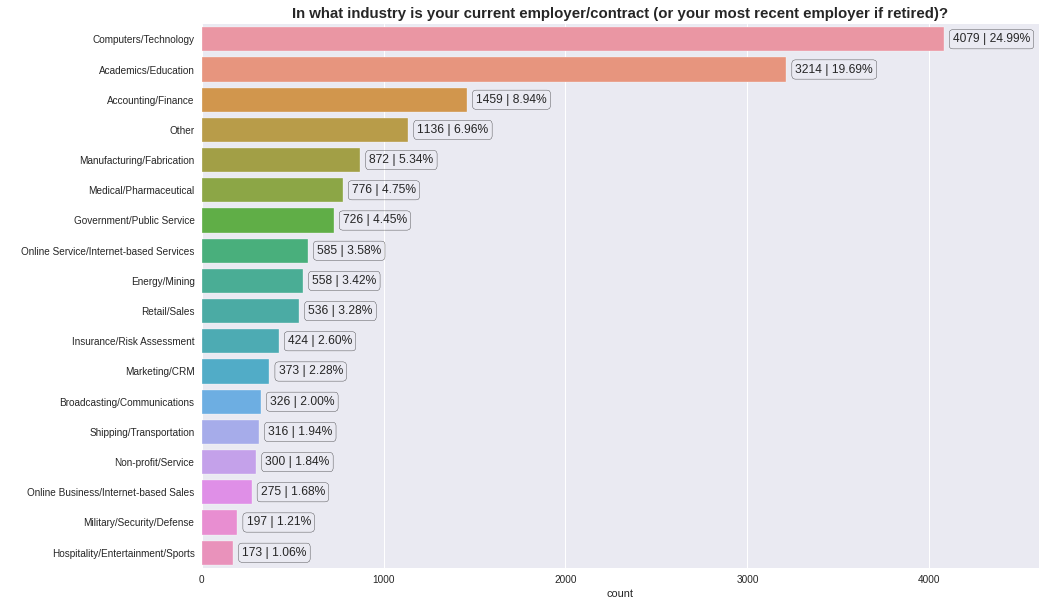

In [33]:
plt.figure(figsize=(15,10))
splot = sns.countplot(y='Q20', data=df, 
                      order = df['Q20'].value_counts().index)

total = df[['Q20']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,4600)
plt.ylabel(' ')
plt.title('In what industry is your current employer/contract (or your most recent employer if retired)?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Top 2 chuyên ngành chiếm tỉ lệ cao nhất là `Computers/Technology` (chiếm $24.99\%$) và `Academics/Education` (chiếm $19.69\%$).

#### Q21. 
Quy mô của công ty nơi bạn đang làm việc là gì?

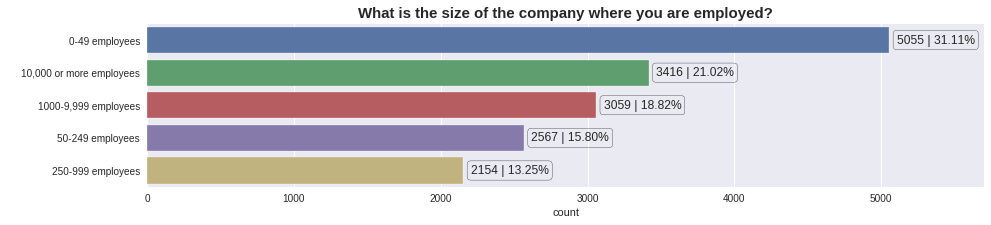

In [34]:
plt.figure(figsize=(15,3))
splot = sns.countplot(y='Q21', data=df, 
                      order = df['Q21'].value_counts().index)

total = df[['Q21']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5700)
plt.ylabel(' ')
plt.title('What is the size of the company where you are employed?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Quy mô công ty với các tỉ lệ phân phố khá đồng đều, trong đó cao nhất là `0-49 employees` (chiếm $31.11\%$) và thấp nhất là `250-999 employees` (chiếm $13.25\%$).

Có giá trị NaN nhưng ko visualize được

#### Q22. <a name = "q22">
Khoảng bao nhiêu cá nhân chịu trách nhiệm về khối lượng công việc khoa học dữ liệu tại địa điểm kinh doanh của bạn?

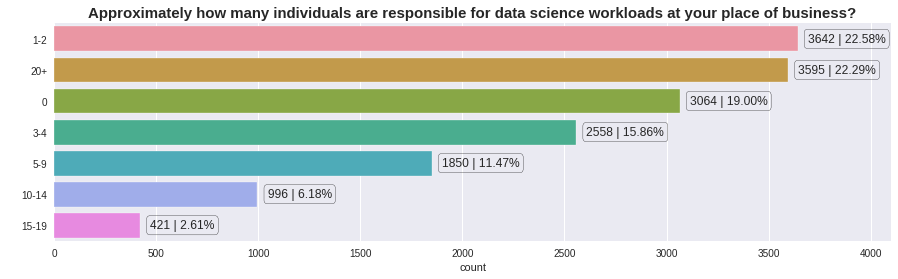

In [35]:
plt.figure(figsize=(15,4))
splot = sns.countplot(y='Q22', data=df, 
                      order = df['Q22'].value_counts().index)

total = df[['Q22']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,4100)
plt.ylabel(' ')
plt.title('Approximately how many individuals are responsible for data science workloads at your place of business?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Số người làm Khoa học dữ liệu (Data Science - DS) trong công ty chủ yếu là `1-2` (chiếm $22.89\%$), `20+` (chiếm $22.29\%$) và `0` (chiếm $19.00\%$). Để tìm hiểu xem số lượng người làm Khoa học dữ liệu có bị ảnh hưởng bởi kích thước của công ty hay không, em tiến hành kết hợp hai thuộc tích [Q21 & Q22](#q21q22) lại với nhau.

#### Q23. 
Nhà tuyển dụng hiện tại của bạn có kết hợp các phương pháp học máy vào công việc kinh doanh của họ không?

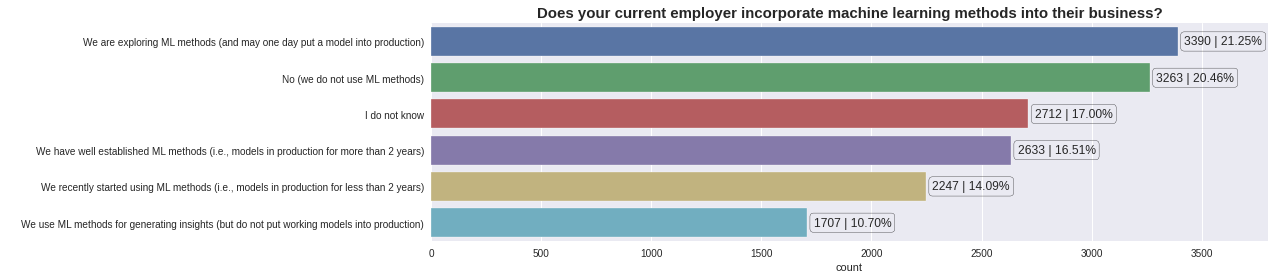

In [36]:
plt.figure(figsize=(15,4))
splot = sns.countplot(y='Q23', data=df, 
                      order = df['Q23'].value_counts().index)

total = df[['Q23']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,3800)
plt.ylabel(' ')
plt.title('Does your current employer incorporate machine learning methods into their business?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Các câu trả lời được bình chọn khá động đều với cao nhất là `We are exploring ML methods (and may one day put a model into production)` (chiếm $21.25\%$) và thấp nhất là `We use ML methods for generating insights (but do not put working models into production)` (chiếm $10.70\%$)

#### Q24. 
Chọn bất kỳ hoạt động nào tạo nên một phần quan trọng trong vai trò của bạn tại nơi làm việc

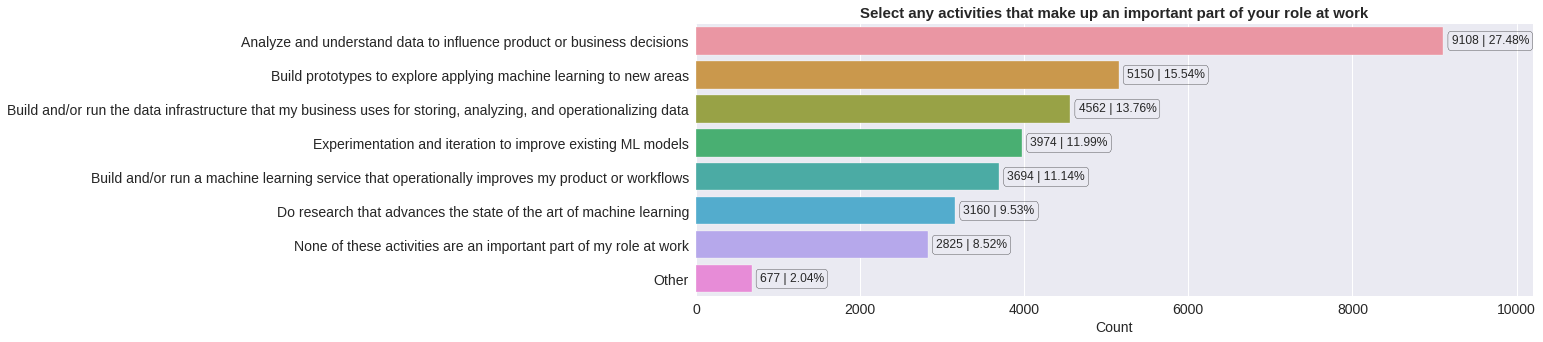

In [37]:
#preparing the data
df_q24 = df[[i for i in df.columns if 'Q24' in i]]
df_q24_all = pd.Series(dtype='int')
for i in df_q24.columns:
    df_q24_all[df_q24[i].value_counts().index[0]] = df_q24[i].count()

df_q24_all = df_q24_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q24_all.values ,y = df_q24_all.index)

#add annotation to each bar
total = df_q24_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 100
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,10200)
plt.title('Select any activities that make up an important part of your role at work',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Hoạt động mà phần lớn người khảo sát cho là quan trọng trong công việc là `Analyze and understand data to influence product or business decisions` (chiếm $27.48\%$)

#### Q25. 
Mức lương thưởng hàng năm hiện tại của bạn (ước tính $ USD) là bao nhiêu?

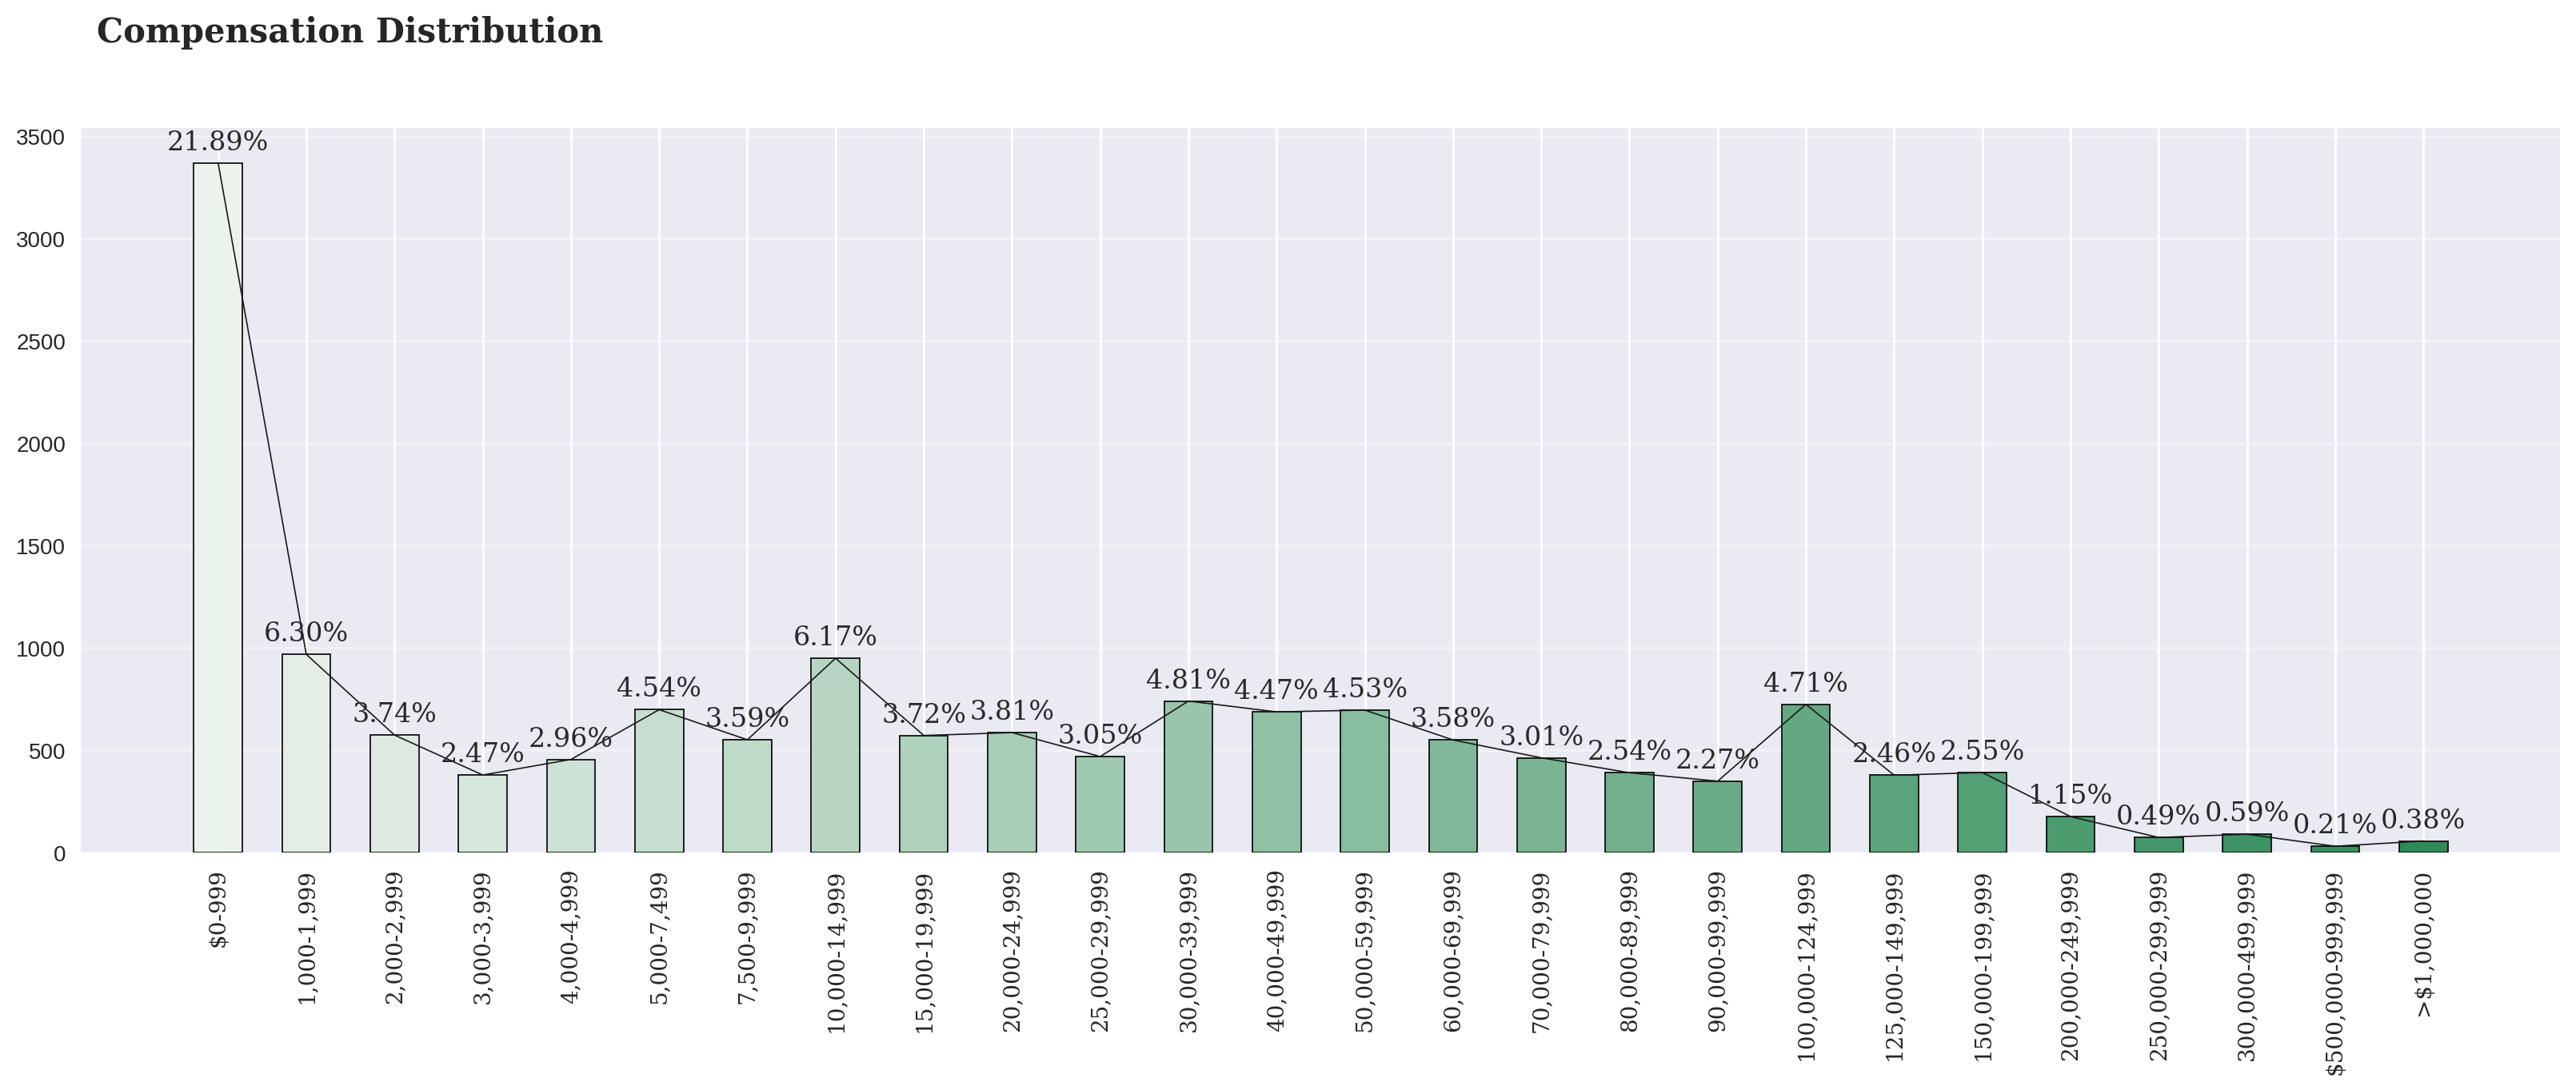

In [38]:
q25_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', 
             '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', 
             '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', 
             '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
             '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000']

data_q25 = df['Q25'].value_counts()[q25_order]

fig, ax = plt.subplots(1,1, figsize=(20, 6), dpi=200)
ax.bar(data_q25.index, data_q25, width=0.55, 
       edgecolor='black', color=sns.light_palette("seagreen", len(data_q25)),
       linewidth=0.6)

ax.plot(data_q25.index, data_q25, c='k', linewidth=0.6)

for i in data_q25.index:
    ax.annotate(f"{data_q25[i]/data_q25.sum()*100:.2f}%", 
                   xy=(i, data_q25[i] + 100),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#2a2a2a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q25.index, fontfamily='serif', rotation=90)

fig.text(0.13, 0.97, 'Compensation Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
clear_output()
plt.show()

**Nhận xét:**
- Những người khảo sát có mức thưởng hằng năm từ `$0-999` cao nhất (chiếm $21.89\%$).
- Những người khảo sát có mức thưởng `> $250,000` chiếm tỉ lệ rất thấp ($<1\%$ cho mỗi khoảng).

#### Q26. 
Bạn (hoặc nhóm của bạn) đã chi khoảng bao nhiêu tiền cho các dịch vụ máy học và / hoặc điện toán đám mây tại nhà (hoặc tại cơ quan) trong 5 năm qua (ước tính $ USD)?

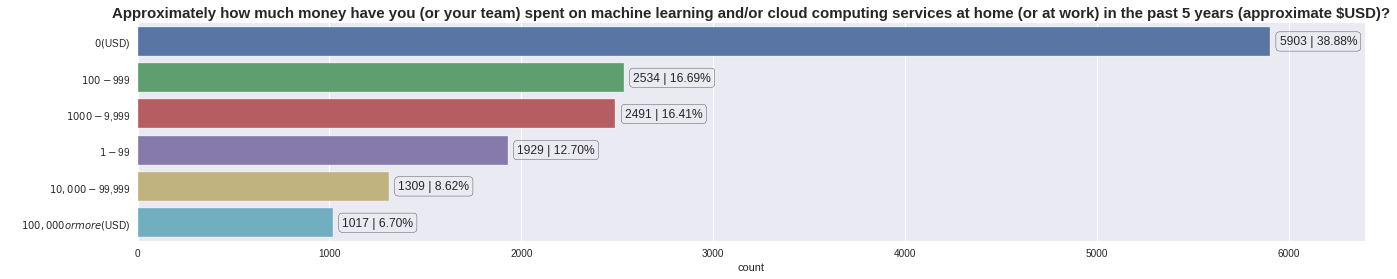

In [39]:
plt.figure(figsize=(22,4))
splot = sns.countplot(y='Q26', data=df, 
                      order = df['Q26'].value_counts().index)

total = df[['Q26']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,6400)
plt.ylabel(' ')    
plt.title('Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Hầu hết người tham gia khảo sát chưa từng chi tiền cho các dịch vụ học máy/điện toán đám mây tại nhà (hoặc tại cơ quan) trong 5 năm qua (tức là chọn `0 (USD)`, chiếm $38.88\%$).

#### Q27-A. 
Bạn thường xuyên sử dụng nền tảng điện toán đám mây nào sau đây?

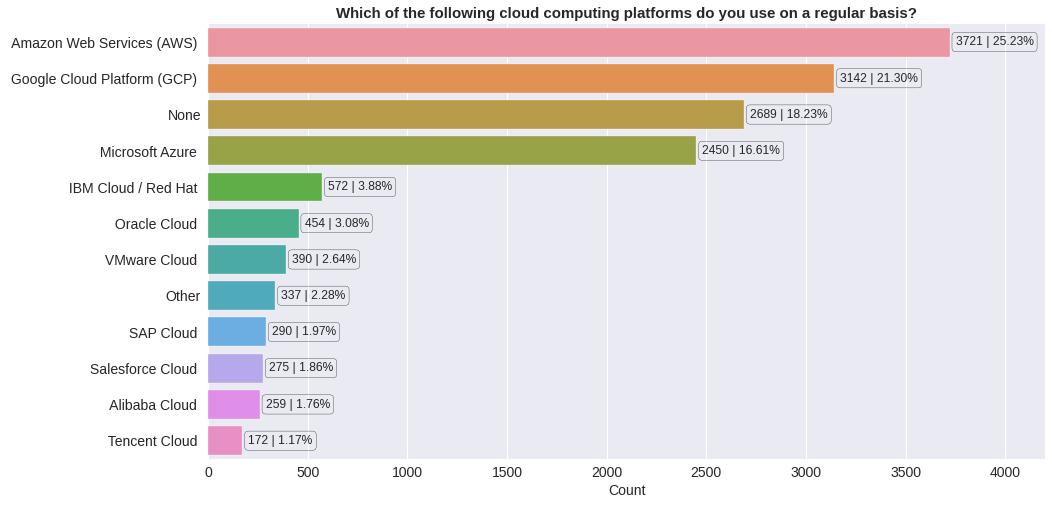

In [40]:
#preparing the data
df_q27a = df[[i for i in df.columns if 'Q27_A' in i]]
df_q27a_all = pd.Series(dtype='int')
for i in df_q27a.columns:
    df_q27a_all[df_q27a[i].value_counts().index[0]] = df_q27a[i].count()

df_q27a_all = df_q27a_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q27a_all.values ,y = df_q27a_all.index)

#add annotation to each bar
total = df_q27a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,4200)
plt.title('Which of the following cloud computing platforms do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 nền tảng điện toán đám mây được người dùng thường xuyên sử dụng nhiều nhất là `Amazon Web Services (AWS)` (chiếm $25.23\%$), `Google Cloud Platform (GCP)` (chiếm $21.30\%$) và `Microsoft Azure` (chiếm $16.61\%$). Nguyên nhân có thể vì 3 dịch vụ điện toán đám mây này hiện nay rất lớn, được hỗ trợ mạnh mẽ và giá thành phải chăng nên được nhiều người sử dụng phổ biến và rộng rãi.

#### Q27-B. 
Bạn hy vọng sẽ trở nên quen thuộc hơn với nền tảng điện toán đám mây nào sau đây trong 2 năm tới?

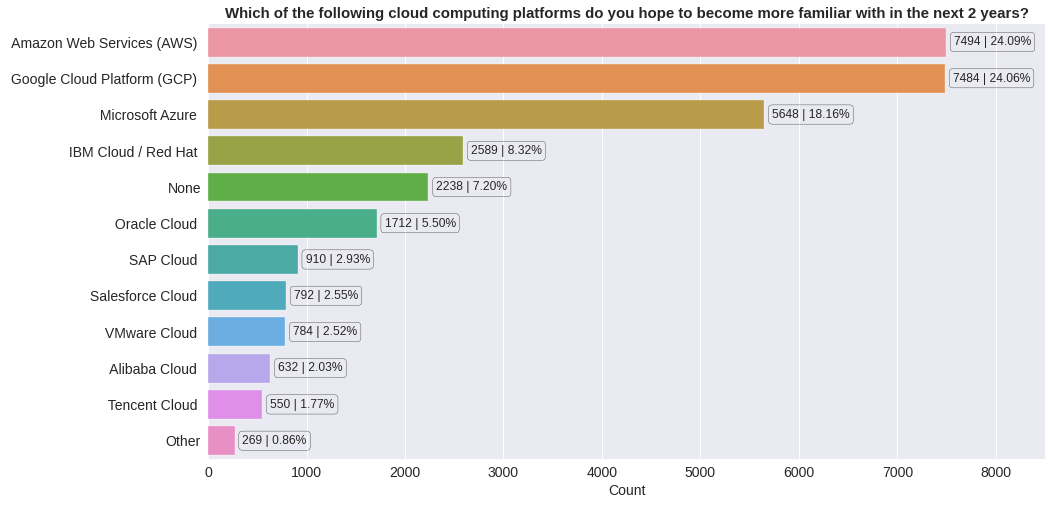

In [41]:
#preparing the data
df_q27b = df[[i for i in df.columns if 'Q27_B' in i]]
df_q27b_all = pd.Series(dtype='int')
for i in df_q27b.columns:
    df_q27b_all[df_q27b[i].value_counts().index[0]] = df_q27b[i].count()

df_q27b_all = df_q27b_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q27b_all.values ,y = df_q27b_all.index)

#add annotation to each bar
total = df_q27b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,8500)
plt.title('Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 nền tảng điện toán đám mây được người dùng hy vọng sẽ trở nên quen thuộc hơn trong 2 năm tới là `Amazon Web Services (AWS)` (chiếm $24.09\%$), `Google Cloud Platform (GCP)` (chiếm $24.06\%$) và `Microsoft Azure` (chiếm $18.16\%$).

#### Q28. 
Trong số các nền tảng đám mây mà bạn đã quen thuộc, nền tảng nào có trải nghiệm nhà phát triển tốt nhất (thú vị nhất khi sử dụng)?

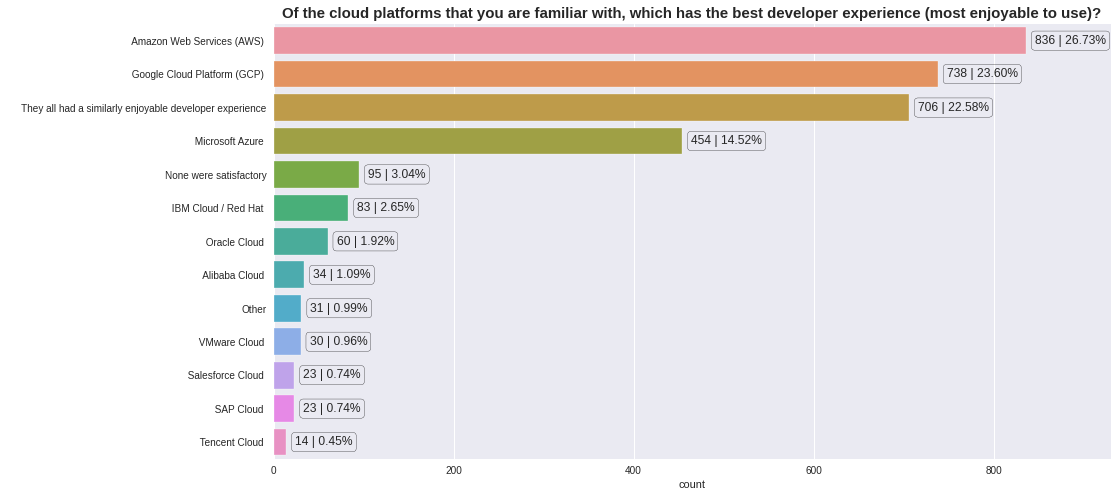

In [42]:
plt.figure(figsize=(15,8))
splot = sns.countplot(y='Q28', data=df,
                      order = df['Q28'].value_counts().index)

total = df[['Q28']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,930)
plt.ylabel(' ')
plt.title('Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Nền tảng điện toán đám mây có trải nghiệm nhà phát triển tốt nhất lần lượt là `Amazon Web Services (AWS)` (chiếm $26.73\%$), `Google Cloud Platform (GCP)` (chiếm $23.60\%$) và `Microsoft Azure` (chiếm $14.52\%$). Ngoài ra, còn có $22.58\%$ người chọn tất cả đều có trải nghiệm thú vị như nhau (tức là `They all had a similarly enjoyable developer experience`).

#### Q29-A. 
Bạn có thường xuyên sử dụng sản phẩm điện toán đám mây nào sau đây không?

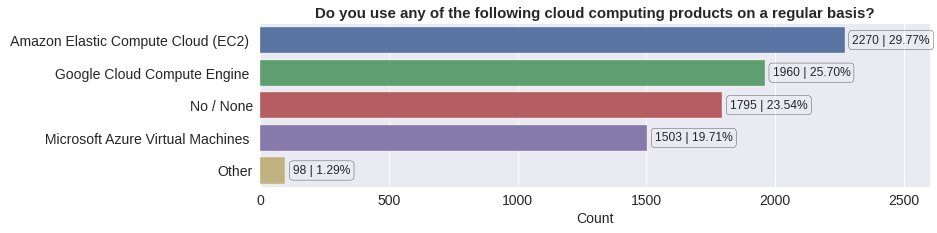

In [43]:
#preparing the data
df_q29a = df[[i for i in df.columns if 'Q29_A' in i]]
df_q29a_all = pd.Series(dtype='int')
for i in df_q29a.columns:
    df_q29a_all[df_q29a[i].value_counts().index[0]] = df_q29a[i].count()

df_q29a_all = df_q29a_all.sort_values(ascending=False)
plt.figure(figsize=(12,3))

splot = sns.barplot(x = df_q29a_all.values ,y = df_q29a_all.index)

#add annotation to each bar
total = df_q29a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,2600)
plt.title('Do you use any of the following cloud computing products on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Hầu hết người khảo sát đều biết và sử dụng các sản phẩm điện toán đám mây kể trên.

#### Q29-B. 
Trong 2 năm tới, bạn có hy vọng trở nên quen thuộc hơn với bất kỳ sản phẩm điện toán đám mây cụ thể nào này không?

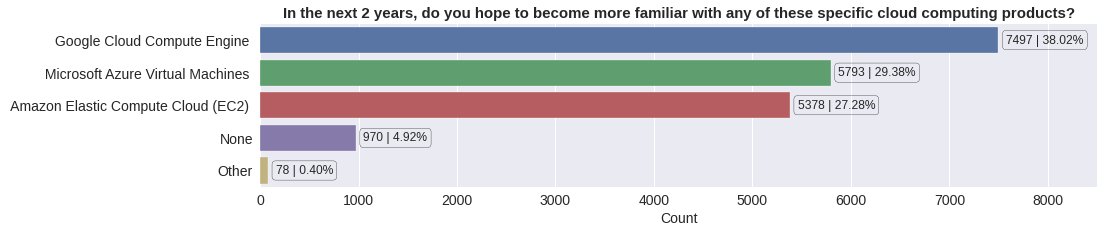

In [44]:
#preparing the data
df_q29b = df[[i for i in df.columns if 'Q29_B' in i]]
df_q29b_all = pd.Series(dtype='int')
for i in df_q29b.columns:
    df_q29b_all[df_q29b[i].value_counts().index[0]] = df_q29b[i].count()

df_q29b_all = df_q29b_all.sort_values(ascending=False)
plt.figure(figsize=(15,3))

splot = sns.barplot(x = df_q29b_all.values ,y = df_q29b_all.index)

#add annotation to each bar
total = df_q29b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,8500)
plt.title('In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Đa số người khảo sát đều hy vọng trở nên quen thuộc hơn với các sản phẩm điện toán đám mây được liệt kê trong vòng 2 năm tới, trong đó nhiều nhất là `Google Clound Compute Engine` (chiếm $38.02\%$).

#### Q30-A. 
Bạn có thường xuyên sử dụng sản phẩm lưu trữ dữ liệu nào sau đây không?

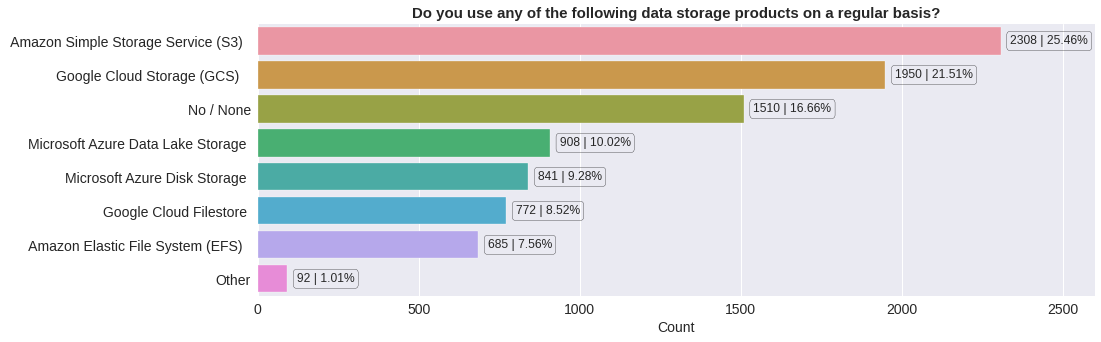

In [45]:
#preparing the data
df_q30a = df[[i for i in df.columns if 'Q30_A' in i]]
df_q30a_all = pd.Series(dtype='int')
for i in df_q30a.columns:
    df_q30a_all[df_q30a[i].value_counts().index[0]] = df_q30a[i].count()

df_q30a_all = df_q30a_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q30a_all.values ,y = df_q30a_all.index)

#add annotation to each bar
total = df_q30a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,2600)
plt.title('Do you use any of the following data storage products on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- 2 sản phẩm lưu trữ dữ liệu được người khảo sát sử dụng thường xuyên nhất là `Amazon Simple Storage Service (S3)` (chiếm $25.46\%$) và `Google Cloud Storage (GCS)` (chiếm $21.51\%$).

#### Q30-B. 
Trong 2 năm tới, bạn có hy vọng sẽ quen thuộc hơn với bất kỳ sản phẩm lưu trữ dữ liệu cụ thể nào không?

Tất cả giá trị của thuộc tính này đều là `NaN` :))

In [46]:
# #preparing the data
# df_q30b = df[[i for i in df.columns if 'Q30_B' in i]]
# df_q30b_all = pd.Series(dtype='int')
# for i in df_q30b.columns:
#     df_q30b_all[df_q30b[i].value_counts().index[0]] = df_q30b[i].count()

# df_q30b_all = df_q30b_all.sort_values(ascending=False)
# plt.figure(figsize=(15,6))

# splot = sns.barplot(x = df_q30b_all.values ,y = df_q30b_all.index)

# #add annotation to each bar
# total = df_q30b_all.values.sum()
# for p in splot.patches:
#     width = p.get_width()
#     ratio = width/total
#     plt.text(80+p.get_width(), p.get_y()+0.55*p.get_height(),
#             '%.1f'%(ratio*100)+'%',
#              ha='center', va='center')

# plt.title('Do you use any of the following data storage products on a regular basis?',fontsize=15,weight='bold')
# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)
# plt.xlabel('Count',fontsize=14)
# clear_output()
# plt.show()

#### Q31-A. 
Bạn có thường xuyên sử dụng bất kỳ sản phẩm học máy được quản lý nào sau đây không?

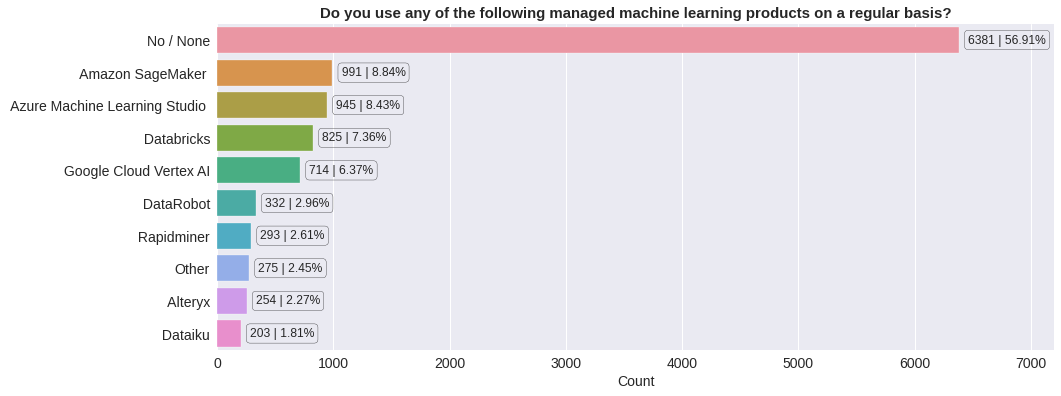

In [47]:
#preparing the data
df_q31a = df[[i for i in df.columns if 'Q31_A' in i]]
df_q31a_all = pd.Series(dtype='int')
for i in df_q31a.columns:
    df_q31a_all[df_q31a[i].value_counts().index[0]] = df_q31a[i].count()

df_q31a_all = df_q31a_all.sort_values(ascending=False)
plt.figure(figsize=(15,6))

splot = sns.barplot(x = df_q31a_all.values ,y = df_q31a_all.index)

#add annotation to each bar
total = df_q31a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,7200)
plt.title('Do you use any of the following managed machine learning products on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Đa số người khảo sát không thường xuyên sử dụng các sản phẩm để quản lý các dự án học máy (tức là `No/None` chiếm $56.91\%$). Còn lại, các lựa các sản phẩm để quản lý các dự án học máy khá đồng đều nhau.

#### Q31-B. 
Trong 2 năm tới, bạn có hy vọng sẽ quen thuộc hơn với bất kỳ sản phẩm máy học được quản lý nào này không?

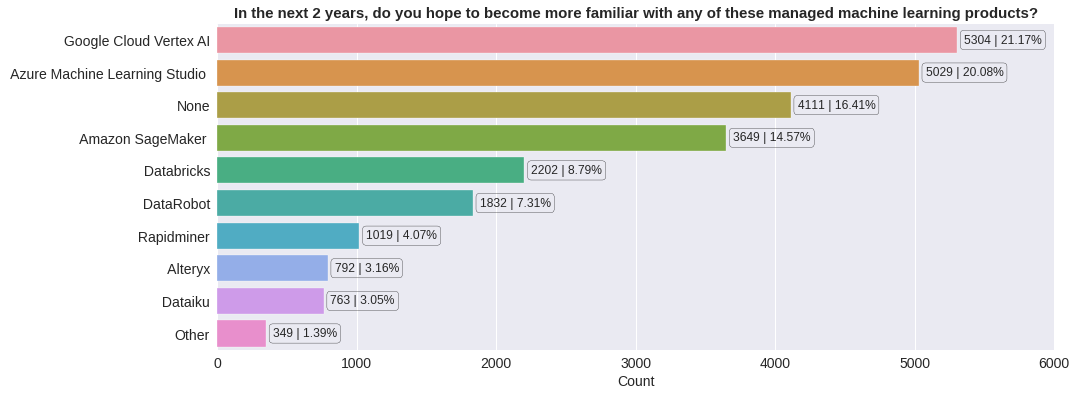

In [48]:
#preparing the data
df_q31b = df[[i for i in df.columns if 'Q31_B' in i]]
df_q31b_all = pd.Series(dtype='int')
for i in df_q31b.columns:
    df_q31b_all[df_q31b[i].value_counts().index[0]] = df_q31b[i].count()

df_q31b_all = df_q31b_all.sort_values(ascending=False)
plt.figure(figsize=(15,6))

splot = sns.barplot(x = df_q31b_all.values ,y = df_q31b_all.index)

#add annotation to each bar
total = df_q31b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,6000)
plt.title('In the next 2 years, do you hope to become more familiar with any of these managed machine learning products?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 sản phẩm quản lý các dự án học máy người khảo sát hy vọng sẽ quen thuộc hơn trong vòng 2 năm tới là `Google Cloud Vertex AI` (chiếm $21.17\%$), `Azure Machine Learning Studio` (chiếm $20.08\%$) và `Amazon SageMaker` (chiếm $14.57\%$).

#### Q32-A. 
Bạn thường xuyên sử dụng sản phẩm dữ liệu lớn nào sau đây (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc các sản phẩm tương tự)?

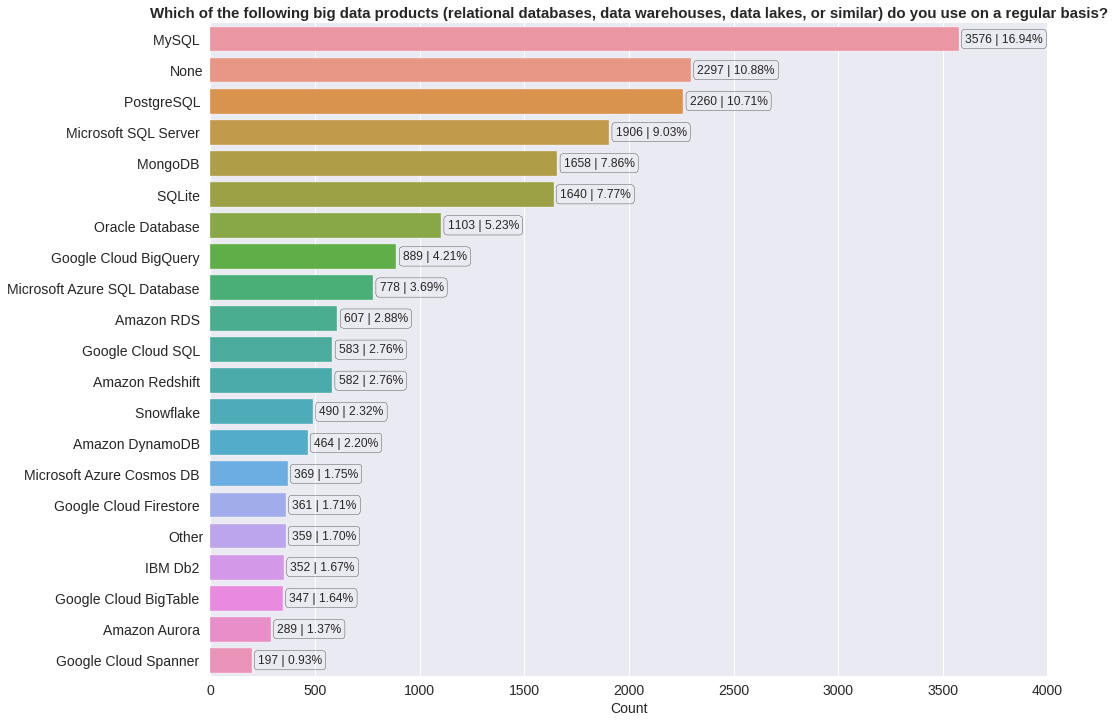

In [49]:
#preparing the data
df_q32a = df[[i for i in df.columns if 'Q32_A' in i]]
df_q32a_all = pd.Series(dtype='int')
for i in df_q32a.columns:
    df_q32a_all[df_q32a[i].value_counts().index[0]] = df_q32a[i].count()

df_q32a_all = df_q32a_all.sort_values(ascending=False)
plt.figure(figsize=(15,12))

splot = sns.barplot(x = df_q32a_all.values ,y = df_q32a_all.index)

#add annotation to each bar
total = df_q32a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 30
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,4000)
plt.title('Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Sản phẩm dữ liệu lớn (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc các sản phẩm tương tự) được người khảo sát thường xuyên sử dụng nhất là `MySQL` (chiếm $16.94\%$). 

#### Q32-B. 
Bạn hy vọng sẽ trở nên quen thuộc hơn với sản phẩm dữ liệu lớn nào sau đây (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc tương tự) trong 2 năm tới?

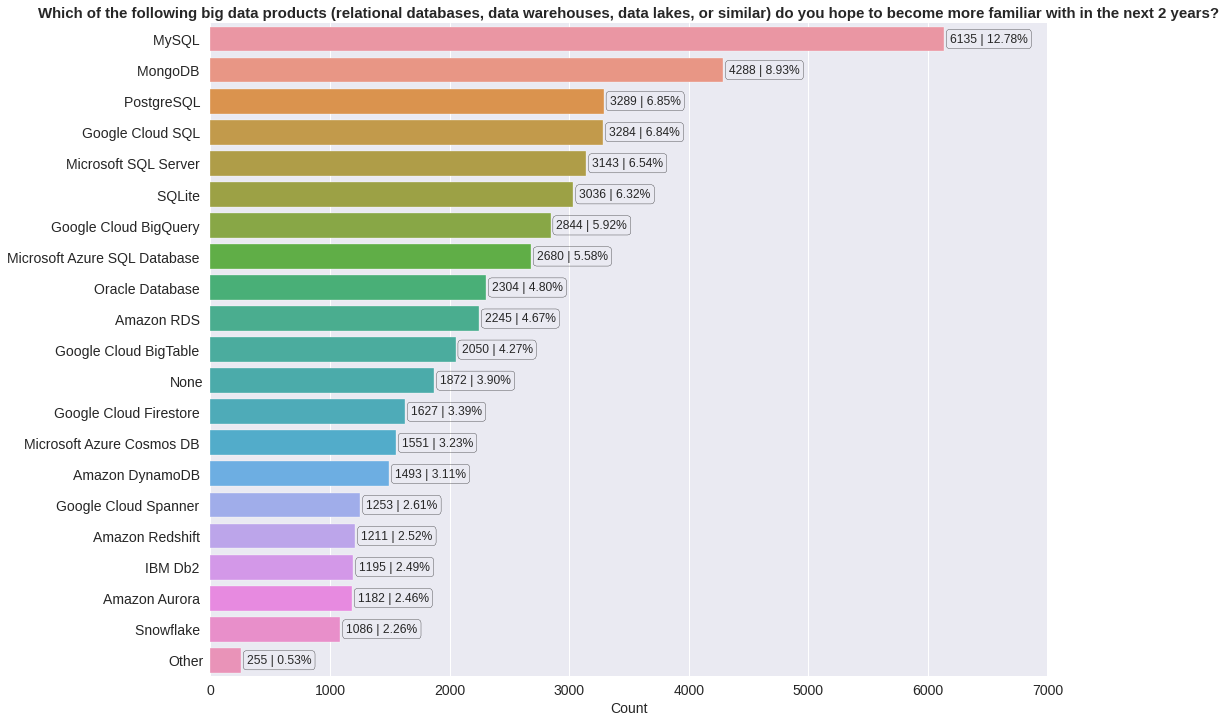

In [50]:
#preparing the data
df_q32b = df[[i for i in df.columns if 'Q32_B' in i]]
df_q32b_all = pd.Series(dtype='int')
for i in df_q32b.columns:
    df_q32b_all[df_q32b[i].value_counts().index[0]] = df_q32b[i].count()

df_q32b_all = df_q32b_all.sort_values(ascending=False)
plt.figure(figsize=(15,12))

splot = sns.barplot(x = df_q32b_all.values ,y = df_q32b_all.index)

#add annotation to each bar
total = df_q32b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,7000)
plt.title('Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Các sản phẩm dữ liệu lớn (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc các sản phẩm tương tự) được người khảo sát hy vọng sẽ trở nên quen thuộc trong vòng 2 năm tới là tương đối đồng đều nhau, tuy nhiên có 2 sản phẩm cao chiếm tỉ lên hơi cao hơn các sản phẩn còn lại là `MySQL` (chiếm $12.78\%$) và `MongoDB` (chiếm $8.93\%$).

#### Q33. 
Bạn thường sử dụng sản phẩm dữ liệu lớn nào sau đây (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc sản phẩm tương tự)?

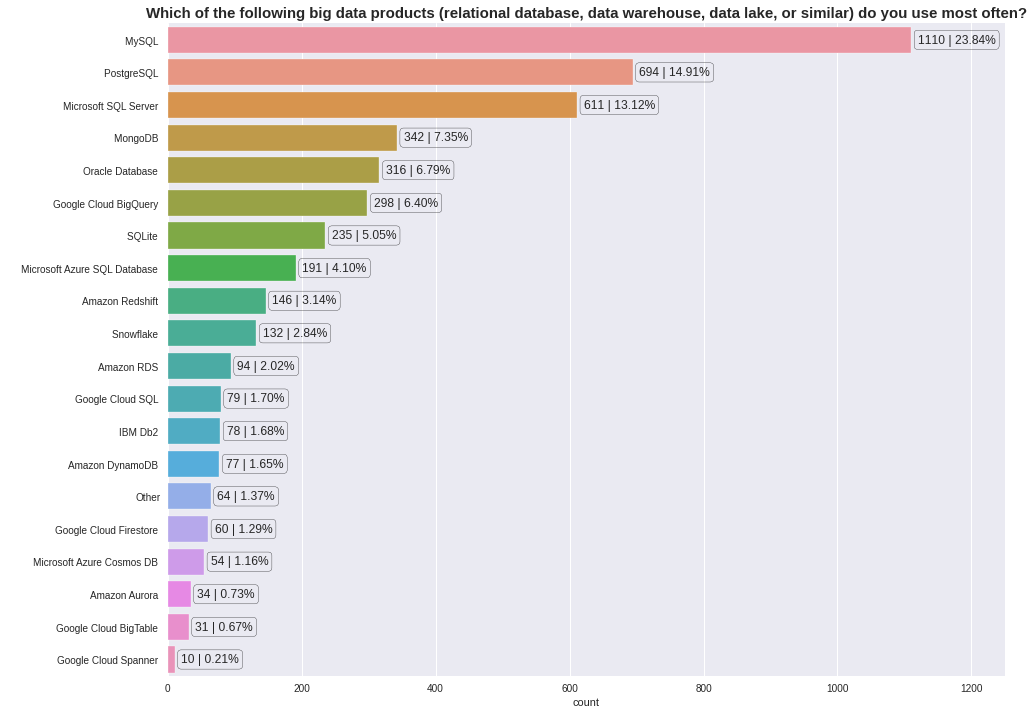

In [51]:
plt.figure(figsize=(15,12))
splot = sns.countplot(y='Q33', data=df,
                      order = df['Q33'].value_counts().index)

total = df[['Q33']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,1250)
plt.ylabel(' ')
plt.title('Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- Top 3 sản phẩm dữ liệu lớn (cơ sở dữ liệu quan hệ, kho dữ liệu, hồ dữ liệu hoặc sản phẩm tương tự) được người khảo sát thường xuyên sử dụng là `MySQL` (chiếm $23.84\%$), `PostgreSQL` (chiếm $14.91\%$) và `Microsoft SQL Server` (chiếm $13.12\%$).

#### Q34-A. 
Bạn sử dụng công cụ thông minh kinh doanh (Business Intelligence - BI) nào sau đây thường xuyên?

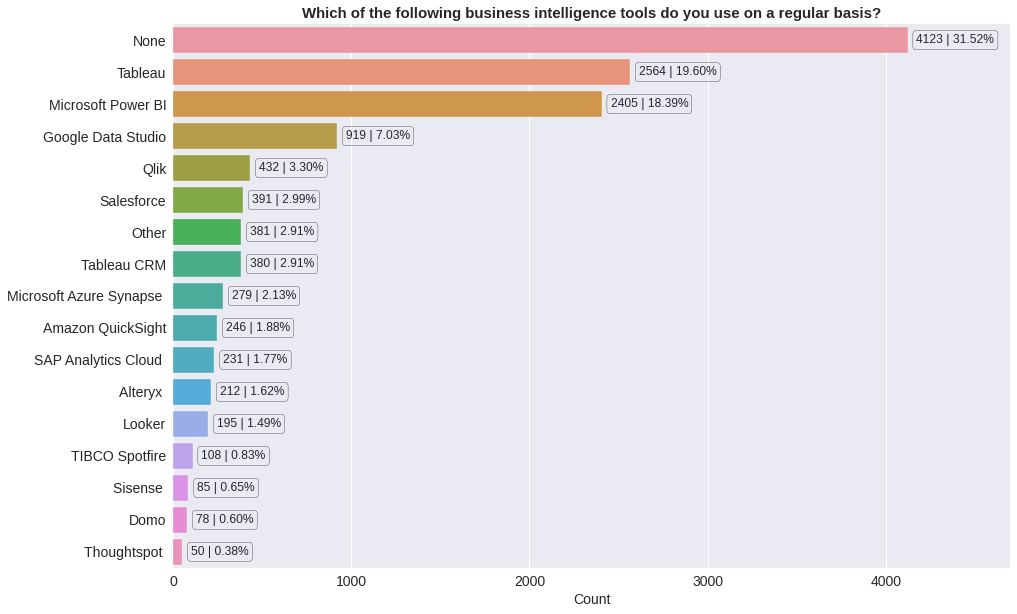

In [52]:
#preparing the data
df_q34a = df[[i for i in df.columns if 'Q34_A' in i]]
df_q34a_all = pd.Series(dtype='int')
for i in df_q34a.columns:
    df_q34a_all[df_q34a[i].value_counts().index[0]] = df_q34a[i].count()

df_q34a_all = df_q34a_all.sort_values(ascending=False)
plt.figure(figsize=(15,10))

splot = sns.barplot(x = df_q34a_all.values ,y = df_q34a_all.index)

#add annotation to each bar
total = df_q34a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,4700)
plt.title('Which of the following business intelligence tools do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người khảo sát không sử dụng các công cụ Business Intelligence - BI nào (tức là chọn `None`, chiếm $31.52\%$). 
- Tuy nhiên cũng có 2 công cụ BI được nhiều người khảo sát sử dụng thường xuyến đó là `Tableau` (chiếm $19.60\%$) và `Microsoft Power BI` (chiếm $19.39\%$). Hiện nay 2 công cụ ngày cũng khá phổ biến và được rất nhiều nhà phân tích dữ liệu tin dùng trong các công việc và dự án cả mình.

#### Q34-B. 

Bạn hy vọng sẽ trở nên quen thuộc hơn với công cụ thông minh kinh doanh (Business Intelligence - BI) nào sau đây trong 2 năm tới?

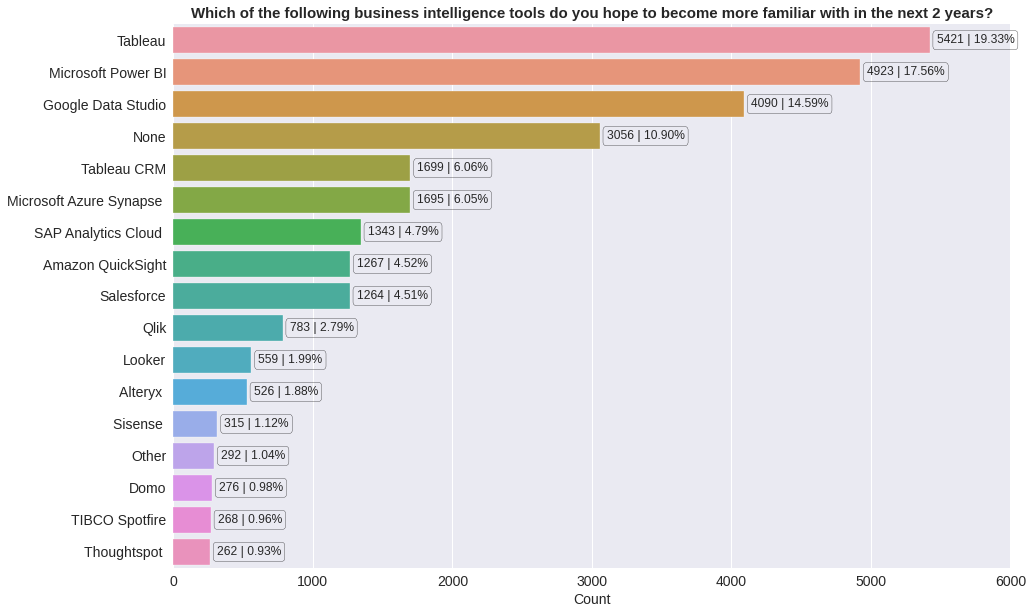

In [53]:
#preparing the data
df_q34b = df[[i for i in df.columns if 'Q34_B' in i]]
df_q34b_all = pd.Series(dtype='int')
for i in df_q34b.columns:
    df_q34b_all[df_q34b[i].value_counts().index[0]] = df_q34b[i].count()

df_q34b_all = df_q34b_all.sort_values(ascending=False)
plt.figure(figsize=(15,10))

splot = sns.barplot(x = df_q34b_all.values ,y = df_q34b_all.index)

#add annotation to each bar
total = df_q34b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,6000)
plt.title('Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 công cụ BI được người khảo sát hy vọng sẽ quen thuộc hơn trong vòng 2 năm tới là `Tableau` (chiếm $19.33\%$), `Microsoft Power BI` (chiếm $17.56\%$) và `Google Data Studio` (chiếm $14.56\%$).

#### Q35. 
Bạn thường sử dụng công cụ thông minh kinh doanh (Business Intelligence - BI) nào nhất?

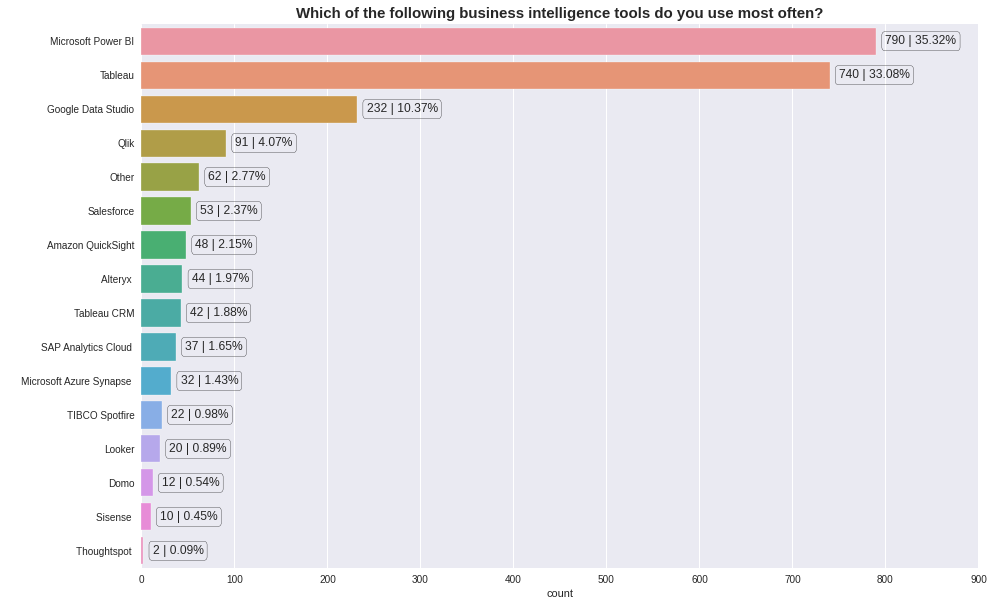

In [54]:
plt.figure(figsize=(15,10))
splot = sns.countplot(y='Q35', data=df,
                      order = df['Q35'].value_counts().index)

total = df[['Q35']].value_counts().sum()

for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,900)
plt.ylabel(' ')
plt.title('Which of the following business intelligence tools do you use most often?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
- 2 công cụ BI được người khảo sát thường sử dụng nhất là `Microsoft Power BI` (chiếm $35.32\%$) và `Tableau` (chiếm $33.08\%$).

#### Q36-A. 
Bạn có thường xuyên sử dụng bất kỳ công cụ học máy tự động nào (hoặc một phần công cụ AutoML) không?

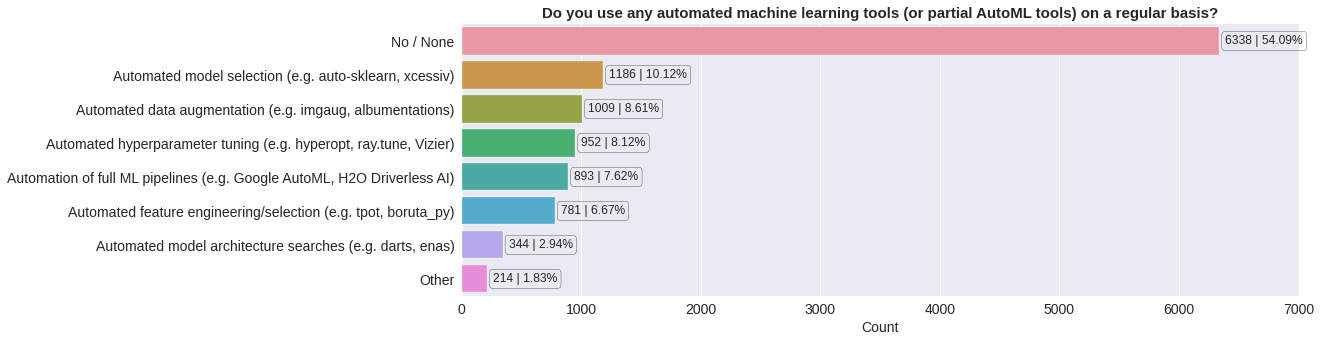

In [55]:
#preparing the data
df_q36a = df[[i for i in df.columns if 'Q36_A' in i]]
df_q36a_all = pd.Series(dtype='int')
for i in df_q36a.columns:
    df_q36a_all[df_q36a[i].value_counts().index[0]] = df_q36a[i].count()

df_q36a_all = df_q36a_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q36a_all.values ,y = df_q36a_all.index)

#add annotation to each bar
total = df_q36a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,7000)
plt.title('Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Đa số người khảo sát không thường xuyên sử dụng các công cụ học máy tự động nào (hoặc một phần công cụ AutoML) (tức là `No/None` chiếm $54.09\%$). Còn lại, các lựa sử dụng các công cụ học máy tự động (hoặc một phần công cụ AutoML) khá đồng đều nhau.

#### Q36-B. 
Bạn hy vọng sẽ trở nên quen thuộc hơn với những loại công cụ học máy tự động nào (hoặc một phần công cụ AutoML) trong 2 năm tới?

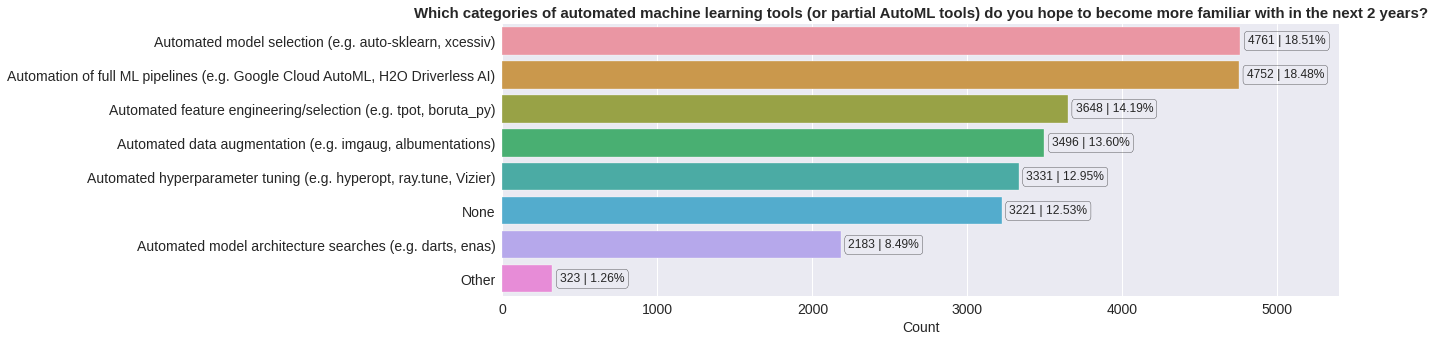

In [56]:
#preparing the data
df_q36b = df[[i for i in df.columns if 'Q36_B' in i]]
df_q36b_all = pd.Series(dtype='int')
for i in df_q36b.columns:
    df_q36b_all[df_q36b[i].value_counts().index[0]] = df_q36b[i].count()

df_q36b_all = df_q36b_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q36b_all.values ,y = df_q36b_all.index)

#add annotation to each bar
total = df_q36b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5400)
plt.title('Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Các lựa chọn những loại công cụ học máy tự động nào (hoặc một phần công cụ AutoML) mà người tham gia khảo sát hy vọng sẽ quen thuộc hơn trong vòng 2 năm tới khá đồng đều nhau.

#### Q37-A. 
Bạn thường xuyên sử dụng công cụ học máy tự động nào sau đây (hoặc một phần công cụ AutoML)?

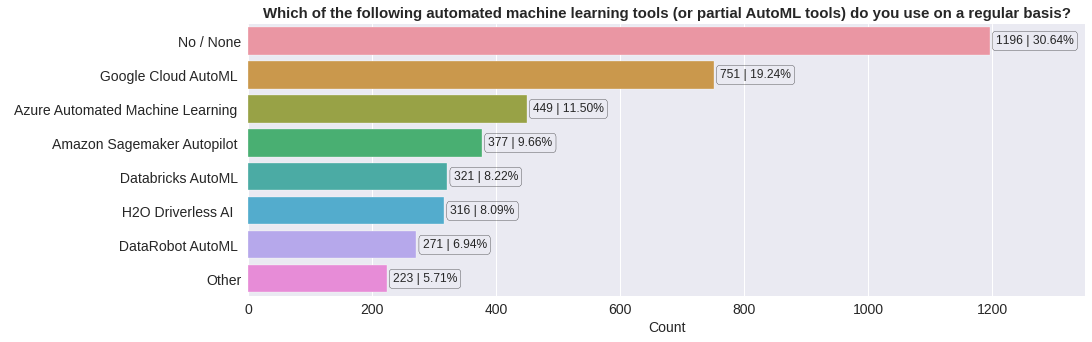

In [57]:
#preparing the data
df_q37a = df[[i for i in df.columns if 'Q37_A' in i]]
df_q37a_all = pd.Series(dtype='int')
for i in df_q37a.columns:
    df_q37a_all[df_q37a[i].value_counts().index[0]] = df_q37a[i].count()

df_q37a_all = df_q37a_all.sort_values(ascending=False)
plt.figure(figsize=(15,5))

splot = sns.barplot(x = df_q37a_all.values ,y = df_q37a_all.index)

#add annotation to each bar
total = df_q37a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,1350)
plt.title('Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người khảo sát không sử dụng công cụ học máy tự động (hoặc một phần công cụ AutoML) nào (tức là chọn `No/None`, chiếm $30.64\%$). 
- Tuy nhiên cũng có 1 công cụ công cụ học máy tự động (hoặc một phần công cụ AutoML) được nhiều người khảo sát sử dụng thường xuyến đó là `Google Cloud AutoML` (chiếm $19.24\%$).

#### Q37-B. 
Bạn hy vọng sẽ quen thuộc hơn với những công cụ học máy tự động cụ thể nào (hoặc một phần công cụ AutoML) trong 2 năm tới?

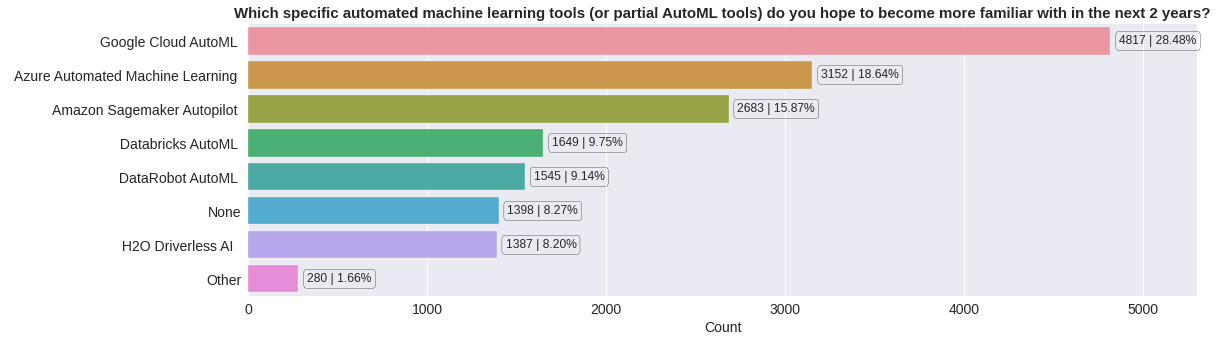

In [58]:
#preparing the data
df_q37b = df[[i for i in df.columns if 'Q37_B' in i]]
df_q37b_all = pd.Series(dtype='int')
for i in df_q37b.columns:
    df_q37b_all[df_q37b[i].value_counts().index[0]] = df_q37b[i].count()

df_q37b_all = df_q37b_all.sort_values(ascending=False)
plt.figure(figsize=(17,5))

splot = sns.barplot(x = df_q37b_all.values ,y = df_q37b_all.index)

#add annotation to each bar
total = df_q37b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5300)
plt.title('Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Top 3 công cụ học máy tự động (hoặc một phần công cụ AutoML) được người khảo sát hy vọng sẽ quen thuộc hơn trong vòng 2 năm tới là `Google Cloud AutoML` (chiếm $28.48\%$), `Azure Automated Machine Learning` (chiếm $18.64\%$) và `Amazon Sagemaker Autopilot` (chiếm $15.87\%$). 

#### Q38-A. 
Bạn có sử dụng bất kỳ công cụ nào để giúp quản lý các thí nghiệm học máy không?

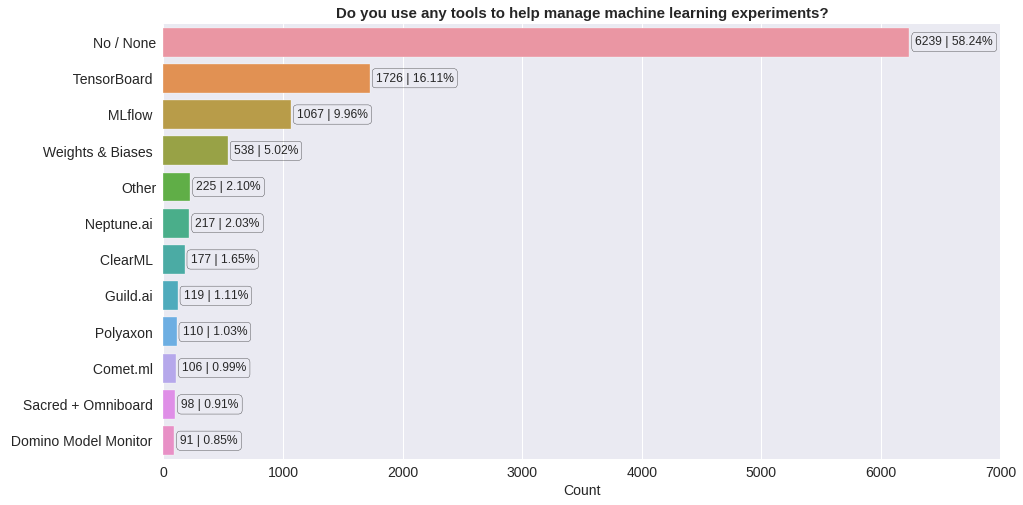

In [59]:
#preparing the data
df_q38a = df[[i for i in df.columns if 'Q38_A' in i]]
df_q38a_all = pd.Series(dtype='int')
for i in df_q38a.columns:
    df_q38a_all[df_q38a[i].value_counts().index[0]] = df_q38a[i].count()

df_q38a_all = df_q38a_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q38a_all.values ,y = df_q38a_all.index)

#add annotation to each bar
total = df_q38a_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,7000)
plt.title('Do you use any tools to help manage machine learning experiments?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người tham gia khảo sát không sử dụng bất kỳ công cụ nào để quản lý các mã nguồn của các dự án Machine Learning (tức là chọn `No/None` chiếm $58.24\%$).
- Tuy nhiên cũng có 1 công cụ được khá nhiều người sử dụng để quản lý mã nguồn của các dự án Machine Learning đó là công cụ `TensorBoard` (chiếm $16.11\%$).

#### Q38-B. 
Trong 2 năm tới, bạn có hy vọng sẽ quen thuộc hơn với bất kỳ công cụ nào trong số những công cụ này để quản lý các thử nghiệm ML không?

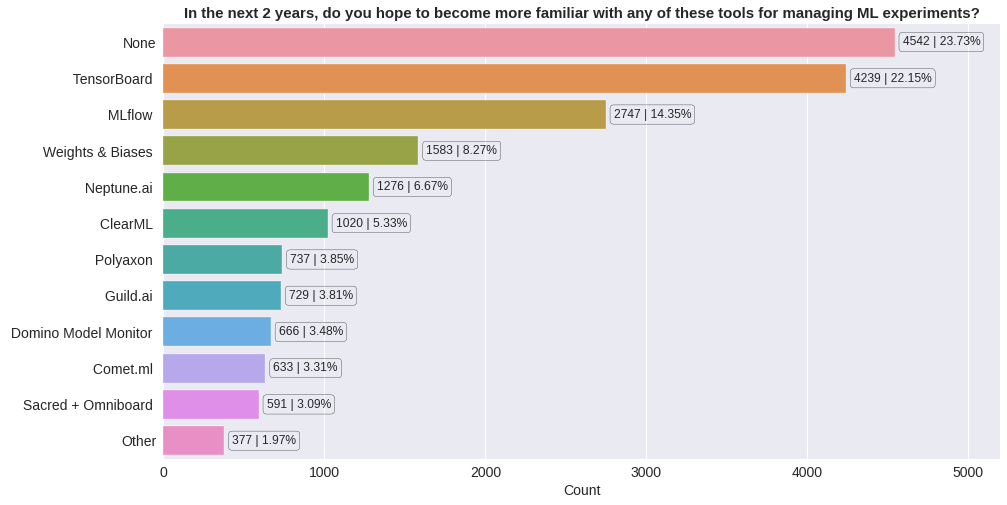

In [60]:
#preparing the data
df_q38b = df[[i for i in df.columns if 'Q38_B' in i]]
df_q38b_all = pd.Series(dtype='int')
for i in df_q38b.columns:
    df_q38b_all[df_q38b[i].value_counts().index[0]] = df_q38b[i].count()

df_q38b_all = df_q38b_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q38b_all.values ,y = df_q38b_all.index)

#add annotation to each bar
total = df_q38b_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5200)
plt.title('In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn người tham gia khảo sát vẫn không hy vọng sẽ quen thuộc hơn với bất kỳ công cụ nào để quản lý các mã nguồn của các dự án Machine Learning trong vòng 2 năm tới (tức là chọn `None` chiếm $23.73\%$).
- Tuy nhiên cũng có 2 công cụ được khá nhiều người hy vọng sẽ quen thuộc hơn để quản lý các mã nguồn của các dự án Machine Learning trong vòng 2 năm tới đó là công cụ `TensorBoard` (chiếm $22.15\%$) và `MLflow` (chiếm $14.35\%$).

#### Q39. 
Bạn chia sẻ công khai các ứng dụng phân tích dữ liệu hoặc máy học của mình ở đâu?

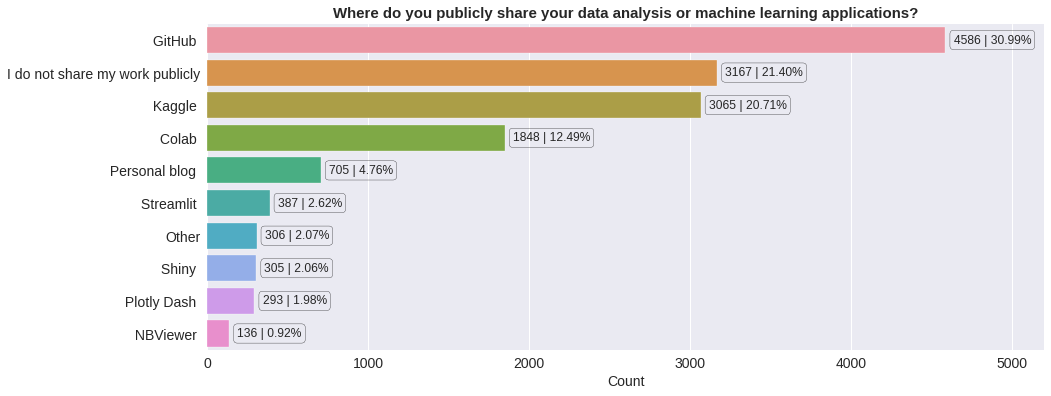

In [61]:
#preparing the data
df_q39 = df[[i for i in df.columns if 'Q39' in i]]
df_q39_all = pd.Series(dtype='int')
for i in df_q39.columns:
    df_q39_all[df_q39[i].value_counts().index[0]] = df_q39[i].count()

df_q39_all = df_q39_all.sort_values(ascending=False)
plt.figure(figsize=(15,6))

splot = sns.barplot(x = df_q39_all.values ,y = df_q39_all.index)

#add annotation to each bar
total = df_q39_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 50
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,5200)
plt.title('Where do you publicly share your data analysis or machine learning applications?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
-	Github, Kaggle, Colab là những nơi phổ biến nhất mà mọi người thường đăng tải thành quả phân tích, nghiên cứu của mình về lĩnh vực ML&DS, nên đây sẽ là những nguồn tài liệu tham khảo cần chọn lọc bổ ích cho người muốn tìm hiểu. Cụ thể là `Github` chiếm $30.99\%$, `Kaggle` chiếm $20.71\%$ và `Colab` chiếm $12.49\%$.

#### Q40.
Bạn đã bắt đầu hoặc hoàn thành các khóa học về khoa học dữ liệu trên nền tảng nào?

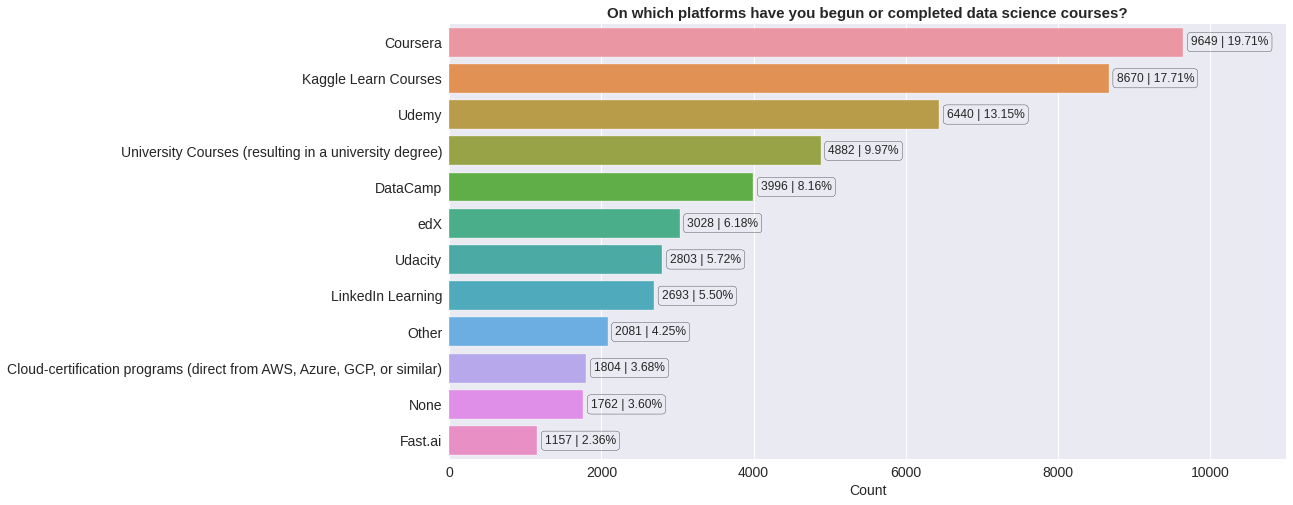

In [62]:
#preparing the data
df_q40 = df[[i for i in df.columns if 'Q40' in i]]
df_q40_all = pd.Series(dtype='int')
for i in df_q40.columns:
    df_q40_all[df_q40[i].value_counts().index[0]] = df_q40[i].count()

df_q40_all = df_q40_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q40_all.values ,y = df_q40_all.index)

#add annotation to each bar
total = df_q40_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 100
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,11000)
plt.title('On which platforms have you begun or completed data science courses?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Phần lớn mọi người đều đã học qua các khóa học trên `Coursera` (chiếm $19.71\%$), `Kaggle Learn Courses` (chiếm $17.71\%$) và `Udemy` (chiếm $13.15\%$), đây là những nền tảng nổi bậc. Kế đó là các khóa học tại các trường Đại học (`University Courses (resulting in a university degree)`). Đây là những nơi nên ưu tiên đăng ký học, có thể nhiều người học vì các khóa học ở đây chất lượng, uy tín, cũng có thể vì một số trong đó miễn phí.
-	Ngoài ra, mọi người cũng tham khảo và học thêm ở các nền tảng khác như `DataCamp`, `edX`, `Udacity`, `Linkedln learning`,…


#### Q41.
Công cụ chính mà bạn sử dụng ở cơ quan hoặc trường học để phân tích dữ liệu là gì?

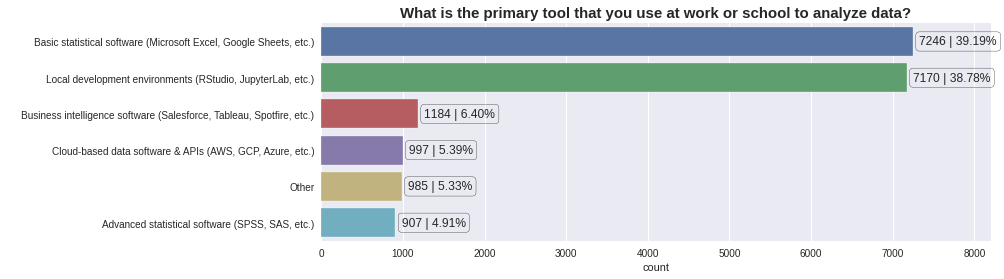

In [63]:
plt.figure(figsize=(12,4))
splot = sns.countplot(y='Q41', data=df,
                      order = df['Q41'].value_counts().index)

total = df[['Q41']].value_counts().sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 80
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,8200)
plt.ylabel(' ')
plt.title('What is the primary tool that you use at work or school to analyze data?', fontsize=15,weight='bold')
clear_output()
plt.show()

**Nhận xét:**
-	Mọi người đều ưu tiên dành sự quan tâm cho 2 công cụ thống kê và phân tích dữ liệu là `Basic statistical software` (chiếm $39.19\%$) như Excel, Google Sheets,… và `Local development envirements` (chiếm $38.78\%$) như Rstudio, JupyterLab,… Đây là những công cụ cơ sở nhất cho việc phân tích dữ liệu.

#### Q42.
Ai / nguồn phương tiện truyền thông yêu thích của bạn đưa tin về các chủ đề khoa học dữ liệu là gì?

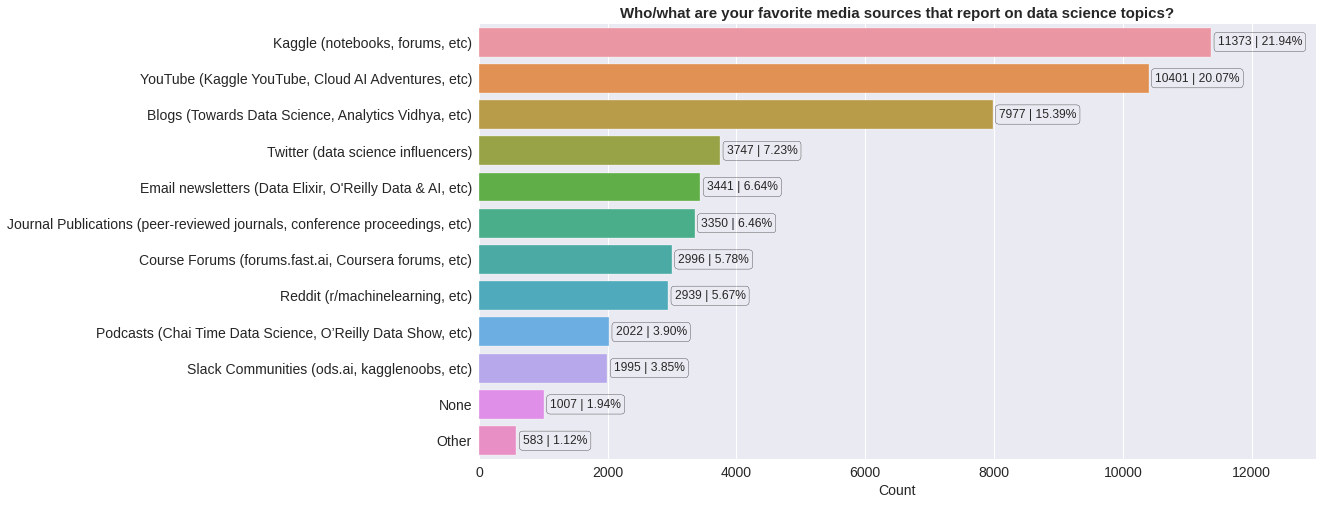

In [64]:
#preparing the data
df_q42 = df[[i for i in df.columns if 'Q42' in i]]
df_q42_all = pd.Series(dtype='int')
for i in df_q42.columns:
    df_q42_all[df_q42[i].value_counts().index[0]] = df_q42[i].count()

df_q42_all = df_q42_all.sort_values(ascending=False)
plt.figure(figsize=(15,8))

splot = sns.barplot(x = df_q42_all.values ,y = df_q42_all.index)

#add annotation to each bar
total = df_q42_all.values.sum()
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  if value == '0':
    pass
  else:
    x = p.get_x() + p.get_width() + 100
    y = p.get_y() + p.get_height() / 2 
    splot.text(x, y, value, ha='left', va='center',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

plt.xlim(0,13000)
plt.title('Who/what are your favorite media sources that report on data science topics?',fontsize=15,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Count',fontsize=14)
clear_output()
plt.show()

**Nhận xét:**
- Các mạng xã hội để cập nhật thông tin về Data Science của mọi người rất đa dạng, có thể vì môi trường làm việc khác nhau nên các nguồn gần gũi với họ cũng khác nhau.
-	Mọi người thường chọn `Kaggle` (chiếm $21.94\%$); `Youtube` (chiếm $20.07\%$); các `Blogs` (chiếm $15.39\%$) như Towards Data Science, Analytics Vihya,… và `Twitter` (chiếm $7.23\%$) để cập nhập các chủ đề về Data Science. Đây là những nguồn truyền thông miễn phí, nhiều người cập nhật báo cáo nên được nhiều người tham gia khảo sát ưu tiên quan tâm.


### EDA kết hợp nhiều thuộc tính

#### Q1 & Q2

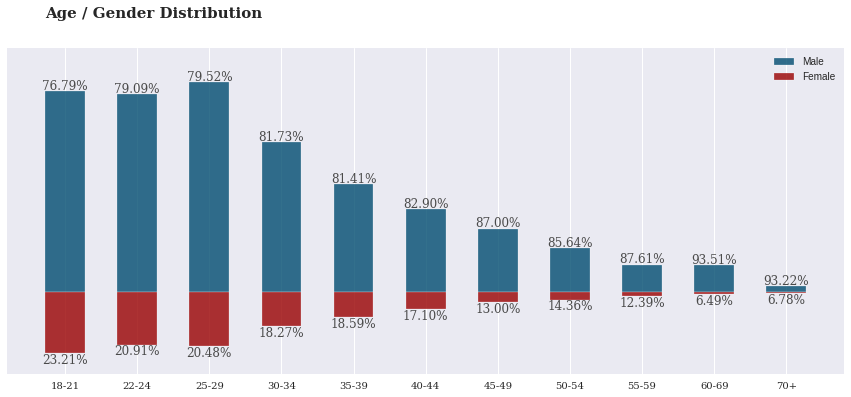

In [65]:
# Q2 Analysis
df['Q2'] = df['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x) # Chuyển các giá trị khác 'Man' và 'Woman' thành giá trị 'ETC'
data_q1q2 = df[df['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1500, 4500)

for i in man.index:
  ratio = man[i]/(man[i] - woman[i])
  ax.annotate('%.2f'%(ratio*100)+'%', #f"{man[i]}", 
              xy=(i, man[i]+ 100),
              va = 'center', ha='center',fontweight='light', fontfamily='serif',
              color='#4a4a4a')
    
for i in woman.index:
  ratio = -woman[i]/(man[i] - woman[i])
  ax.annotate('%.2f'%(ratio*100)+'%', #f"{-woman[i]}", 
              xy=(i, woman[i] - 120),
              va = 'center', ha='center',fontweight='light', fontfamily='serif',
              color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu xem tỉ lệ nam và nữ trong từng độ tuổi khác nhau tham gia khảo sát nên ta sẽ kết hợp 2 thuộc tính này lại với nhau.

**Nhận xét**:
- Tỉ lệ nam giới luôn cao vượt trội hơn nữ giới ở tất cả các độ tuổi khác nhau, ít nhất là cao gấp gần 4 lần (ở độ tuổi $22-29$) và nhiều nhất là cao gấp hơn 14 lần (ở độ tuổi $60-69$).
- Độ tuổi càng tăng cao thì tỉ lệ *nam giới càng tăng* và tỉ lệ *nữ giới càng giảm* (So sánh với tỉ lệ nam-nữ ở từng độ tuối, không phải so sánh với tổng thể). 

#### Q2 & Q4

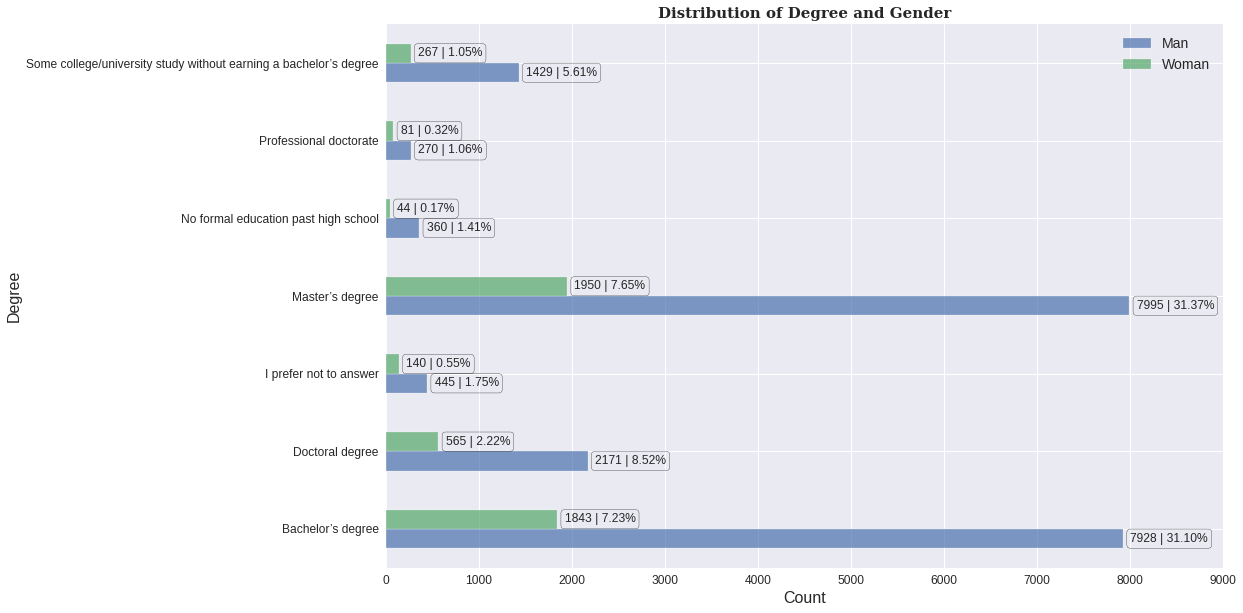

In [66]:
#Let's narrow the genders to only men and women to facilitate the analysis(as they are the main categories)
gender_df = df[df['Q2'].isin(['Man','Woman'])]
table = gender_df.groupby(['Q4', 'Q2']).size().reset_index().pivot(columns='Q2', index='Q4', values=0)
plt.style.use('seaborn')
    
splot = table.plot(kind='barh', figsize=(15,10), alpha=0.7)

total = table.values.sum()

#ploting the annotation text
for p in splot.patches:
  value = f'{p.get_width():.0f} | {(p.get_width()/total):,.2%}'
  x = p.get_x() + p.get_width() + 80
  y = p.get_y() + p.get_height() / 2 
  splot.text(x, y, value, ha='left', va='center',
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

#Decorating the plot
plt.xlim(0, 9000)
plt.legend(prop={'size': 14})
plt.xlabel('Count',fontsize=16)
plt.ylabel('Degree',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Degree and Gender',fontsize=15,weight='bold', fontfamily='serif')
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu xem tỉ lệ nam và nữ trong từng mức độ học vấn khác nhau tham gia khảo sát nên ta sẽ kết hợp 2 thuộc tính này lại với nhau.


**Nhận xét**:
-  Đa số người khảo sát có `Degree = ["Bachelor's degree", "Master's degree"]` (chiếm $>75\%$). 
-  Tỉ lệ nam gấp từ `3-5` lần tỉ lệ nữ ở các mức độ học vấn khác nhau. Cá biệt `Degree = ["No formal education past high school"]` tỉ lệ nam gấp $> 8$ lần tỉ lệ nữ. 

#### Q2 & Q3

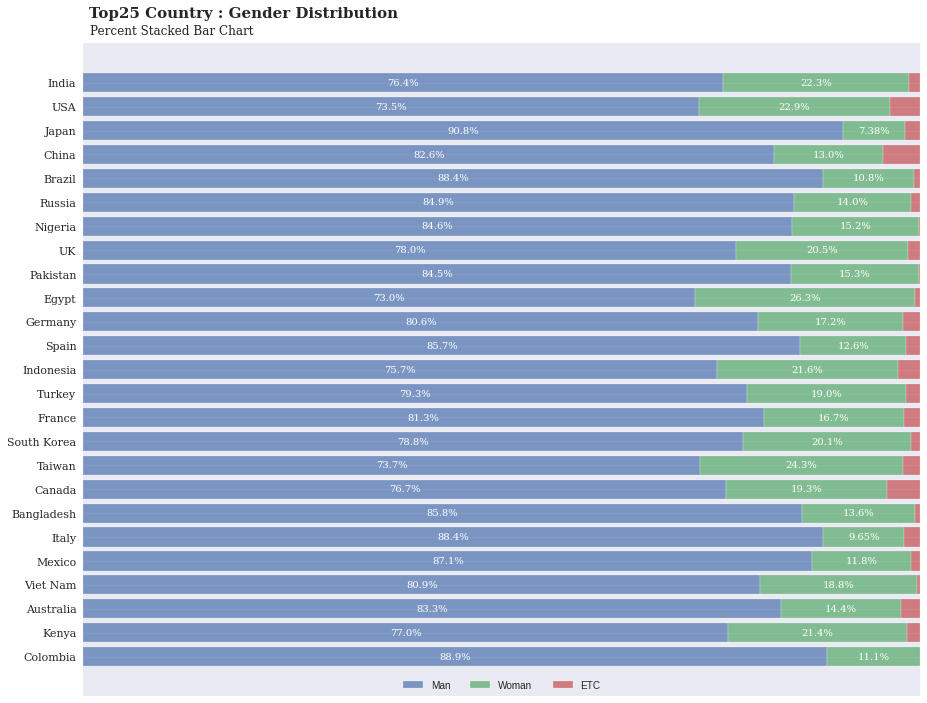

In [67]:
q3_order = df['Q3'].value_counts()[:26].drop('Other').index
data_q2q3 = df[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]


fig, ax = plt.subplots(1,1,figsize=(15, 12),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], alpha=0.7, label='ETC')

ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.91, 'Top25 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.005))
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu xem tỉ lệ nam và nữ của các quốc gia khác nhau tham gia khảo sát nên ta sẽ kết hợp 2 thuộc tính này lại với nhau.

**Nhận xét**:
- Tỉ nam của top 25 quốc gia tham gia khảo sát chiếm tỉ lệ từ $73.0\%-90.8\%$. Trong đó, cao nhất là Nhật Bản (`Japan` chiếm $90.8\%$) và thấp nhất là Ai Cập (`Egypt` chiếm $73.0\%$).
- Tỉ nữ của top 25 quốc gia tham gia khảo sát chiếm tỉ lệ từ $7.38\%-26.3\%$. Trong đó, cao thấp là Nhật Bản (`Japan` chiếm $7.38\%$) và cao nhất là Ai Cập (`Egypt` chiếm $26.3\%$).

#### Q5 & Q7

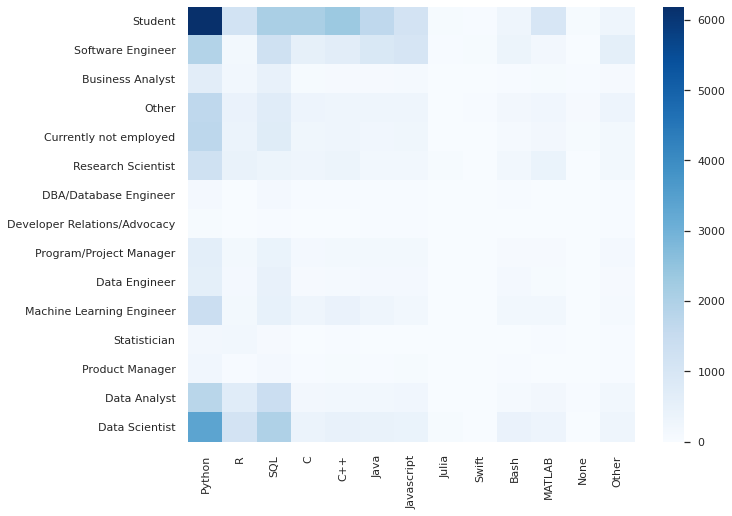

In [68]:
ques7 = df[['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
              'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10','Q7_Part_11','Q7_Part_12', 'Q7_OTHER']]
ques7.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
temp = ques7.copy()
df_7 = ques7.count().to_frame()

columns_7 = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
              'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10','Q7_Part_11','Q7_Part_12', 'Q7_OTHER']

mat_7 = []
df_5 = df['Q5'].value_counts(sort=False).to_frame()
for i in range(len(df_5.index)):
  row = []
  for j in range(len(df_7.index)):
    temp = df[df[columns_7[j]] == df_7.index[j]]
    temp = temp[temp['Q5'] == df_5.index[i]]
    row.append(temp['Q1'].count())
  mat_7.append(row)
correl_7_5 = pd.DataFrame(mat_7)
correl_7_5.index = df_5.index
correl_7_5.columns = df_7.index

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(correl_7_5, cmap='Blues')
clear_output()
plt.show()

**Nguyên nhân**:
- Tìm hiểu xem ngôn ngữ nào phù hợp với bạn?

**Nhận xét**:
- Nếu bạn hướng đến 1 vị trí nghề nghiệp nào bên trên hãy cân nhắc chuẩn bị các kỹ năng cần thiết với các ngôn ngữ có ô màu đậm nhất trong hàng (không xét sinh viên vì sinh viên học nhiều ngôn ngữ khác nhau vì nhiều định hướng khác nhau của họ).
- Ví dụ nếu bạn muốn hướng đến trở thành một Software Engineer bạn nên sẵn sàng làm việc với Python, SQL, Java, Java Script.



#### Q5 & Q15 <a name = "q5q15">

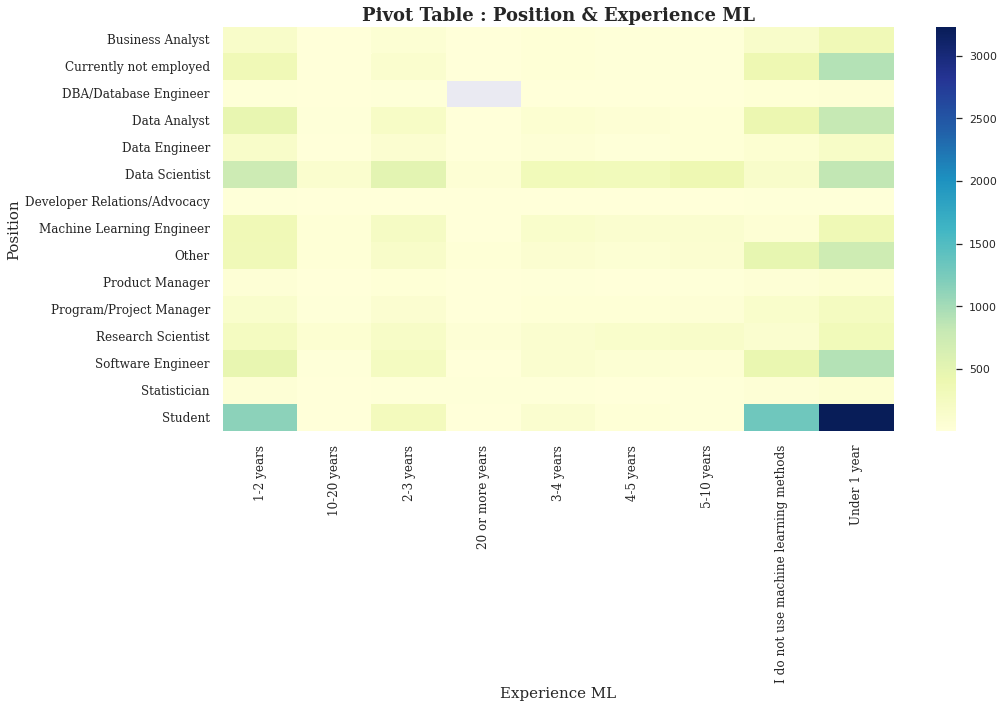

In [69]:
table = df.groupby(['Q5', 'Q15']).size().reset_index().pivot(columns='Q15', index='Q5', values=0)

fig, ax =plt.subplots(figsize = (15,10))

sns.heatmap(table, cmap = 'YlGnBu')

ax.set_title('Pivot Table : Position & Experience ML', fontsize=18, fontweight='bold', fontfamily='serif',)
ax.set_ylabel('Position',fontsize=15, fontfamily='serif')
ax.set_xlabel('Experience ML',fontsize=15, fontfamily='serif')
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', fontsize=12, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', fontsize=12)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Để trả lời cho giải thuyết đã đặt ra ở [Q15](#q15)


**Nhận xét**:
- Với giả thuyết 1: "*những người chưa từng sử dụng các phương pháp máy học chủ yếu là sinh viên mới vào đại học chưa được tiếp cận nhiều với các chuyên ngành*". Ta thấy hầu hết người chọn `I do not use machine learning methods` là `Student` $=>$ có thể giả thuyết 1 là đúng.
- Với giả thuyết 2: "*những người chưa từng sử dụng các phương pháp máy học là làm trong lĩnh vực không cần sừ dụng các phương pháp học máy*". Ta thấy người chọn `I do not use machine learning methods` là làm ngành về `Software Engineer`, `Data Analyst`, `Other`. Những ngành nghề này hầu như ít liên quan đến học máy. Ngoài ra còn có thất nghiệp (`Currently not employed`) $=>$ có thể giả thuyết 2 đúng.

#### Q15 & Q16 <a name = "q15q16">

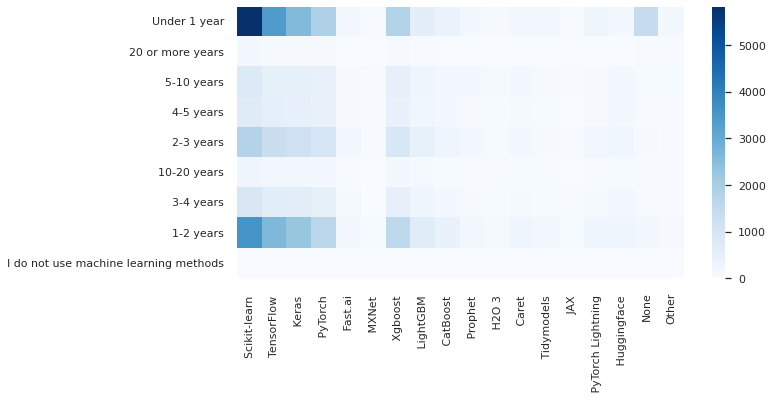

In [70]:
df_15 = df['Q15'].value_counts(sort=False).to_frame()

ques16 = df[['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6',
              'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10','Q16_Part_11','Q16_Part_12',
              'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17', 'Q16_OTHER']]
ques16.columns = ['  Scikit-learn ', '  TensorFlow ', ' Keras ', ' PyTorch ', ' Fast.ai ',
                 ' MXNet ', ' Xgboost ', ' LightGBM ', ' CatBoost ',
                  ' Prophet ', ' H2O 3 ', ' Caret ', ' Tidymodels ',
                 ' JAX ', ' PyTorch Lightning ', ' Huggingface ', 'None', 'Other']
df_16 = ques16.count().to_frame()

mat_16 = []



columns_16 = ['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6',
              'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10','Q16_Part_11','Q16_Part_12',
              'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17', 'Q16_OTHER']

for i in range(len(df_15.index)):
  row = []
  for j in range(len(df_16.index)):
    temp = df[df[columns_16[j]] == df_16.index[j]]
    temp = temp[temp['Q15'] == df_15.index[i]]
    row.append(temp['Q1'].count())
  mat_16.append(row)
correl_16_15 = pd.DataFrame(mat_16)
correl_16_15.index = df_15.index
correl_16_15.columns = df_16.index


ax = sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(correl_16_15, cmap='Blues') 
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu kinh nghiệm của người tham gia khảo sát chọn frameworks nào?


**Nhận xét**:
- Ta thấy những người từng sử dụng qua các thuật toán ML dù là ít hay nhiều kinh nghiệm đều quan tâm và sử dụng đến Scikit-learn, Tensorflow, Keras, Pytorch, Xgboost.
- Có một phần nhỏ sinh viên không sử dụng frameworks nào trong khi họ đã có tiếp xúc với ML dưới 1 năm, có thể là họ chỉ mới học những kiến thức hàn lâm và chưa thực nghiệm.

#### Q15 & Q17 <a name = "q15q17">

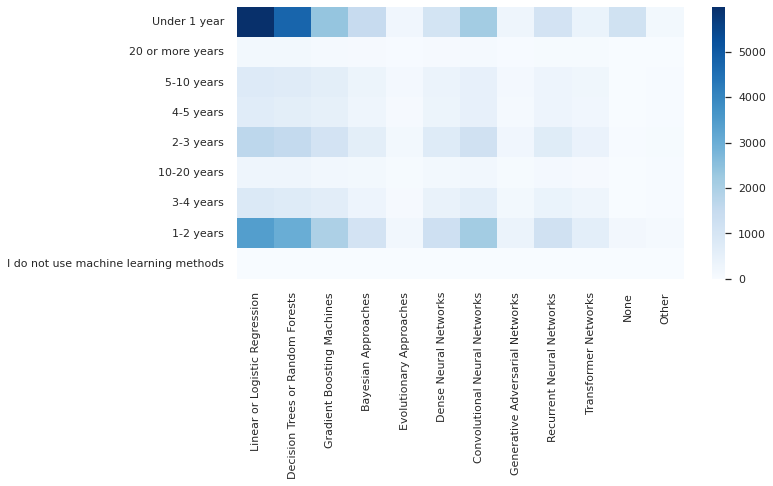

In [71]:
df_15 = df['Q15'].value_counts(sort=False).to_frame()

ques17 = df[['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6',
              'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10','Q17_Part_11', 'Q17_OTHER']]
ques17.columns = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines',
                 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks', 'Convolutional Neural Networks',
                  'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks',
                 'None', 'Other']
df_17 = ques17.count().to_frame()

columns_17 = ['Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6',
              'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10','Q17_Part_11', 'Q17_OTHER']
name_columns_17 = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
                 'Bayesian Approaches', 'Evolutionary Approaches', 'Dense Neural Networks (MLPs, etc)', 'Convolutional Neural Networks',
                  'Generative Adversarial Networks', 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)',
                 'None', 'Other']
mat_17 = []
for i in range(len(df_15.index)):
  row = []
  for j in range(len(name_columns_17)):
    temp = df[df[columns_17[j]] == name_columns_17[j]]
    temp = temp[temp['Q15'] == df_15.index[i]]
    row.append(temp['Q1'].count())
  mat_17.append(row)
correl_17_15 = pd.DataFrame(mat_17)
correl_17_15.index = df_15.index
correl_17_15.columns = df_17.index


ax = sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(correl_17_15, cmap='Blues') 
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu kinh nghiệm của người tham gia khảo sát chọn ML methods nào?


**Nhận xét**:
- Linear or Logistic Regression và Decision Trees or Random Forests là 2 nhóm thuật toán cơ bản nhất cho người mới bắt đầu. 

- Bên cạnh các thuật toán cơ bản ta thấy được mọi người cũng rất quan tâm đến 2 thuật toán về Convolutional Neural Networks và Recurrent Neural Networks, tập trung vào những người có kinh nghiệm 3 năm trở xuống. Có thể giải thích cho kết quả như sau, 2 bài toán nổi bật trong lĩnh vực Machine Learning ở thời điểm hiện tại là Computer Vision và Natural Language Processing, và 2 thuật toán trên chính là 2 thuật toán cơ sở tương ứng với 2 bài toán này.

#### Q15 & Q18 <a name = "q15q18">

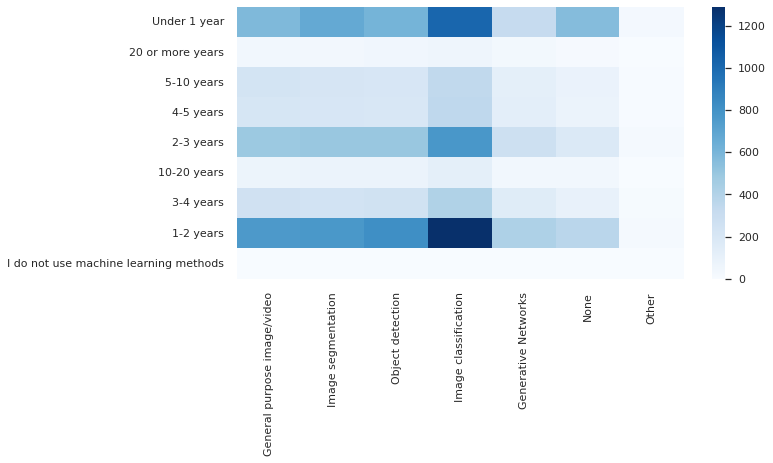

In [72]:
df_15 = df['Q15'].value_counts(sort=False).to_frame()

ques18 = df[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6',
              'Q18_OTHER']]
ques18.columns = ['General purpose image/video',
                 'Image segmentation', 'Object detection',
                  'Image classification',
                 'Generative Networks', 'None', 'Other']
df_18 = ques18.count().to_frame()

name_columns_18 = ['General purpose image/video tools (PIL, cv2, skimage, etc)',
                 'Image segmentation methods (U-Net, Mask R-CNN, etc)', 'Object detection methods (YOLOv3, RetinaNet, etc)',
                  'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)',
                 'Generative Networks (GAN, VAE, etc)', 'None', 'Other']
columns_18 = ['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6',
              'Q18_OTHER']

mat_18 = []
for i in range(len(df_15.index)):
  row = []
  for j in range(len(name_columns_18)):
    temp = df[df[columns_18[j]] == name_columns_18[j]]
    temp = temp[temp['Q15'] == df_15.index[i]]
    row.append(temp['Q1'].count())
  mat_18.append(row)
correl_18_15 = pd.DataFrame(mat_18)
correl_18_15.index = df_15.index
correl_18_15.columns = df_18.index


ax = sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(correl_18_15, cmap='Blues') 
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu kinh nghiệm của người tham gia khảo sát chọn CV methods nào?


**Nhận xét**:
- Phần lớn mọi người bắt đầu với bài toán Image Classification.
- Bên cạnh đó mọi người còn quan tâm đến 3 bài toán General purpose image/video, Image Segmentation, Object detection.
- Ở năm nhất trong 3 bài toán trên mọi người khá quan tâm đến Image Segmentation, nhưng sang năm thứ 2 và 3 số lượng này chia đều lại với 2 bài toán còn lại, có thể là vì bài toán này khó hơn.

#### Q15 & Q19 <a name = "q15q19">

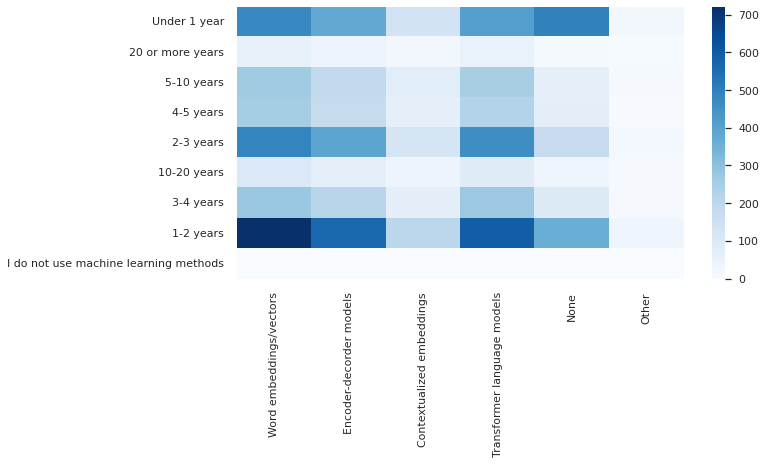

In [73]:
df_15 = df['Q15'].value_counts(sort=False).to_frame()

ques19 = df[['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER']]
ques19.columns = ['Word embeddings/vectors',
                  'Encoder-decorder models',
                  'Contextualized embeddings',
                  'Transformer language models', 'None', 'Other']
df_19 = ques19.count().to_frame()

name_columns_19 = ['Word embeddings/vectors (GLoVe, fastText, word2vec)',
                   'Encoder-decorder models (seq2seq, vanilla transformers)',
                   'Contextualized embeddings (ELMo, CoVe)',
                   'Transformer language models (GPT-3, BERT, XLnet, etc)', 'None', 'Other']
columns_19 = ['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER']

mat_19 = []
for i in range(len(df_15.index)):
  row = []
  for j in range(len(name_columns_19)):
    temp = df[df[columns_19[j]] == name_columns_19[j]]
    temp = temp[temp['Q15'] == df_15.index[i]]
    row.append(temp['Q1'].count())
  mat_19.append(row)
correl_19_15 = pd.DataFrame(mat_19)
correl_19_15.index = df_15.index
correl_19_15.columns = df_19.index


ax = sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(correl_19_15, cmap='Blues') 
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm hiểu kinh nghiệm của người tham gia khảo sát chọn NLP methods nào?


**Nhận xét**:
-	Các kỹ thuật được sử dụng xuyên suốt thời gian làm việc của mọi người là kỹ thuật Word embeddings/vector, Encoder - decoder models và ít hơn là Tranformer languages models. 2 kỹ thuật Word embeddings/vector, Encoder - decoder models là cơ sở và Tranformer languages models là một phiên bản cải tiến trong những năm gần đây.

-	Kỹ thuật Contextualized embedding rất ít so với 3 nhóm còn lại vì bản thân nó rất khó để sử dụng, kể cả những người có nhiều kinh nghiệm họ vẫn ưu tiên sử dụng 3 kỹ thuật kia hơn.

#### Q21 & Q22 <a name = "q21q22">

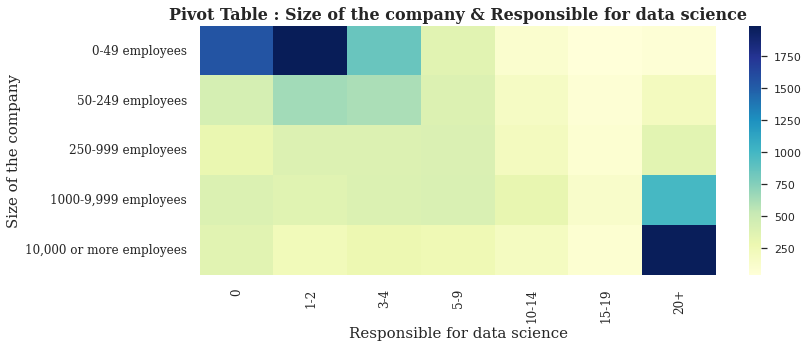

In [74]:
q21_order = ['0-49 employees', '50-249 employees', '250-999 employees', '1000-9,999 employees', '10,000 or more employees']
q22_order = ['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
table = df.groupby(['Q21', 'Q22']).size().reset_index().pivot(columns='Q21', index='Q22', values=0)[q21_order].T[q22_order]

fig, ax =plt.subplots(figsize = (12,5))

sns.heatmap(table, cmap = 'YlGnBu')

ax.set_title('Pivot Table : Size of the company & Responsible for data science', fontsize=16, fontweight='bold', fontfamily='serif',)
ax.set_ylabel('Size of the company',fontsize=15, fontfamily='serif')
ax.set_xlabel('Responsible for data science',fontsize=15, fontfamily='serif')
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', fontsize=12, rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', fontsize=12)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Để trả lời cho câu hỏi đã đặt ra ở [Q22](#q22)


**Nhận xét**:
- Nhìn vào sự tương qua của 2 thuộc tính thì phần nào đó có thể thấy rằng số người làm Khoa học dữ liệu trong công ty phụ thuộc vào kích thước của công ty:
  + Công ty có kích thước vừa và nhỏ (`0-249 employees`) thì số người làm Khoa học dữ liệu ít (`0-4`).
  + Công ty có kích thước lớn (`>1000 employees`) thì số người làm Khoa học dữ liệu nhiều (`20+`).

#### Q1 & Q4 & Q5 & Q6 <a name = "q1q4q5q6">

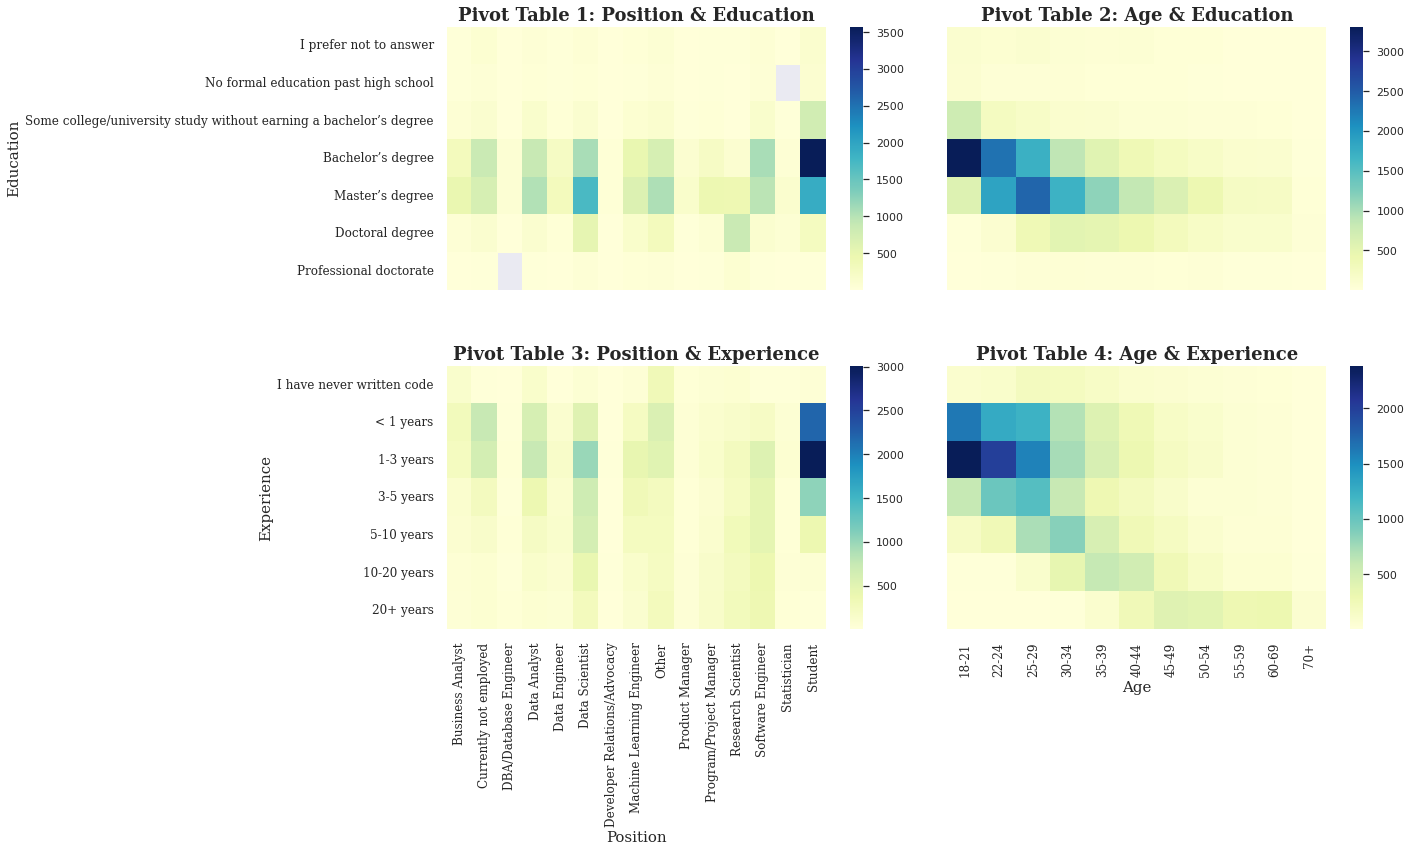

In [75]:
q4_order = ["I prefer not to answer", "No formal education past high school", 
            "Some college/university study without earning a bachelor’s degree", 
            "Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional doctorate"]

q6_order = ['I have never written code', '< 1 years', '1-3 years',
            '3-5 years', '5-10 years', '10-20 years', '20+ years']

table1 = df.groupby(['Q4', 'Q5']).size().reset_index().pivot(columns='Q5', index='Q4', values=0).T[q4_order].T
table2 = df.groupby(['Q5', 'Q6']).size().reset_index().pivot(columns='Q6', index='Q5', values=0)[q6_order].T
table3 = df.groupby(['Q1', 'Q4']).size().reset_index().pivot(columns='Q4', index='Q1', values=0)[q4_order].T
table4 = df.groupby(['Q1', 'Q6']).size().reset_index().pivot(columns='Q6', index='Q1', values=0)[q6_order].T

fig, ax =plt.subplots(2,2,figsize = (20,12))

sns.heatmap(table1, cmap = 'YlGnBu', ax=ax[0,0])
sns.heatmap(table2, cmap = 'YlGnBu', ax=ax[1,0])
sns.heatmap(table3, cmap = 'YlGnBu', ax=ax[0,1])
sns.heatmap(table4, cmap = 'YlGnBu', ax=ax[1,1])

ax[0,0].set_title('Pivot Table 1: Position & Education', fontsize=18, fontweight='bold', fontfamily='serif',)
ax[0,1].set_title('Pivot Table 2: Age & Education', fontsize=18, fontweight='bold', fontfamily='serif',)
ax[1,0].set_title('Pivot Table 3: Position & Experience', fontsize= 18, fontweight='bold', fontfamily='serif',)
ax[1,1].set_title('Pivot Table 4: Age & Experience', fontsize= 18, fontweight='bold', fontfamily='serif',)

ax[0,0].set_ylabel('Education',fontsize=15, fontfamily='serif')
ax[1,0].set_ylabel('Experience',fontsize=15, fontfamily='serif')
ax[0,1].set_ylabel(' ')
ax[1,1].set_ylabel(' ')

ax[0,0].set_xlabel(' ')
ax[0,1].set_xlabel(' ')
ax[1,0].set_xlabel('Position',fontsize=15, fontfamily='serif')
ax[1,1].set_xlabel('Age',fontsize=15, fontfamily='serif')

ax[0,0].set_xticklabels(' ')
ax[0,1].set_xticklabels(' ')
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), fontfamily='serif', rotation=90)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), fontfamily='serif', rotation=90)

ax[0,1].set_yticklabels(' ')
ax[1,1].set_yticklabels(' ')
ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(), fontfamily='serif')
ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(), fontfamily='serif')

ax[0,0].tick_params(axis='both',which='both', labelsize=12)
ax[0,1].tick_params(axis='both',which='both', labelsize=12)
ax[1,0].tick_params(axis='both', labelsize=12)
ax[1,1].tick_params(axis='both', labelsize=12)
ax[1,0].tick_params(axis='x',rotation=90)
ax[1,1].tick_params(axis='x',rotation=90)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Tìm hiểu mối tương quan giữa các thuộc tính.

**Nhận xét**:
- Table Pivot 1:
  + `Position` hầu hết đều có `Education = ["Bachelor’s degree", "Master’s degree"]`.
  + `Education = ["Doctoral degree", "Professional doctorate"]` tập trung phần lớn vào nhóm có `Position = ["Data Scientist", "Research Scientist"]`

- Table Pivot 2:
  + `Education = ["Bachelor’s degree"]` tập trung phần lớn ở độ tuổi $18-44$.
  + `Education = ["Master’s degree"]` tập trung phần lớn ở độ tuổi $18-54$.
  + `Education = ["Doctoral degree"]` tập trung phần lớn ở độ tuổi $25-44$.
  + Ở các giá trị còn lại phân bố khá đồng đều.


- Table Pivot 3:
  + `Experience = ['I have never written code']` thì phần lớn công việc của họ là `Position = ['Business Analyst', 'Data Analyst', 'Other']`. Điều này có vẻ khá hợp lý vì theo em thì làm các công việc BA, DA thì hầu hết sẽ dùng tool làm dữ liệu (trực quan & phân tích) và ít khi code (đã giải thích được câu hỏi đặt ra ở [Q6](#q6)).



- Table Pivot 4:
  + Có vài điểm dữ liệu bất thường ví dụ như trong độ tuổi $18-29$ nhưng số năm kinh nghiệm lại là $20+$ (học code từ năm 9 tuổi, điều này hơi khó tin).
  + Số năm kinh nghiệp viết code $<3$ càng giảm khi tuổi càng tăng, điều này là hợp lý vì theo em nghĩ thì tuổi càng cao thì kinh nghiệm viết code sẽ càng nhiều. Phần này chiếm $>50\%$ số lượng người khảo sát, trong đó tập trung vào khoảng độ tuổi từ $18-34$.
  + Số năm kinh nghiệp viết code $3-5$ tập trung phần lớn ở độ tuổi $18-34$.
  + Số năm kinh nghiệp viết code $5-10$ tập trung phần lớn ở độ tuổi $25-39$.
  + Số năm kinh nghiệp viết code $10-20$ tập trung phần lớn ở độ tuổi $30-54$.
  + Số năm kinh nghiệp viết code $20+$ tập trung phần lớn ở độ tuổi $40-69$.

#### Q4 & Q6 & Q25

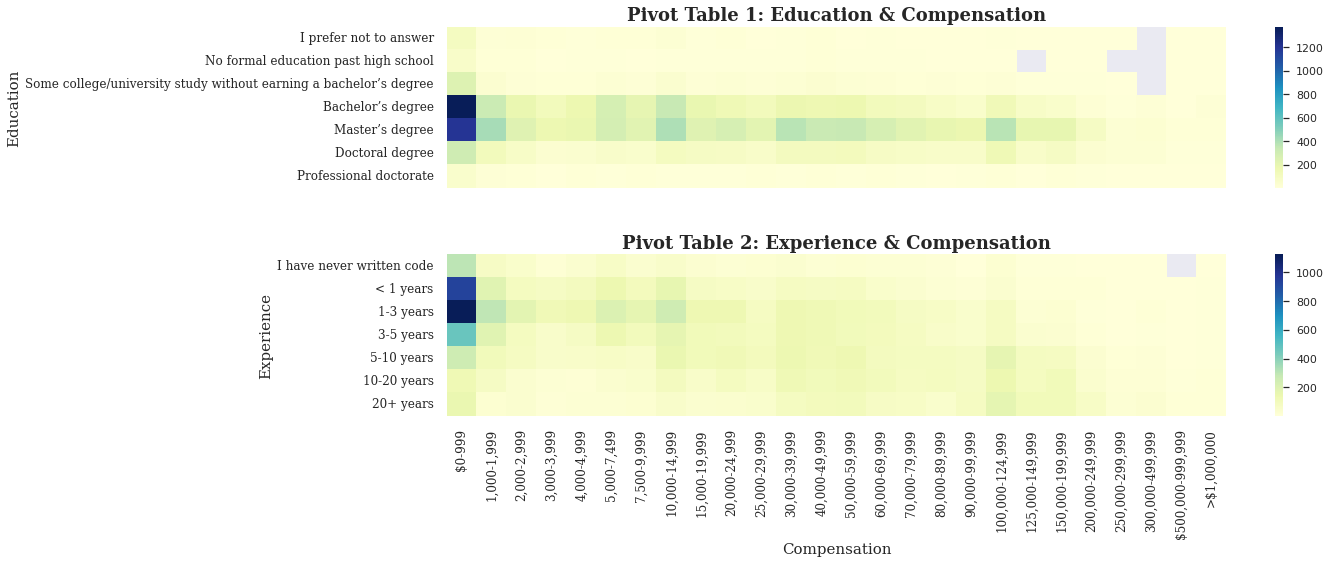

In [76]:
q25_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', 
             '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', 
             '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', 
             '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999',
             '200,000-249,999', '250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000']

table1 = df.groupby(['Q4', 'Q25']).size().reset_index().pivot(columns='Q25', index='Q4', values=0)[q25_order].T[q4_order].T
table2 = df.groupby(['Q6', 'Q25']).size().reset_index().pivot(columns='Q25', index='Q6', values=0)[q25_order].T[q6_order].T

fig, ax =plt.subplots(2,1,figsize = (20,8))

sns.heatmap(table1, cmap = 'YlGnBu', ax=ax[0])
sns.heatmap(table2, cmap = 'YlGnBu', ax=ax[1])

ax[0].set_title('Pivot Table 1: Education & Compensation', fontsize=18, fontweight='bold', fontfamily='serif',)
ax[1].set_title('Pivot Table 2: Experience & Compensation', fontsize=18, fontweight='bold', fontfamily='serif',)

ax[0].set_ylabel('Education',fontsize=15, fontfamily='serif',)
ax[1].set_ylabel('Experience',fontsize=15, fontfamily='serif',)

ax[0].set_xlabel(' ')
ax[1].set_xlabel('Compensation',fontsize=15, fontfamily='serif',)

ax[0].set_xticklabels(' ')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontfamily='serif', rotation=90, fontsize=12)

ax[0].set_yticklabels(ax[0].get_yticklabels(), fontfamily='serif', fontsize=12)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontfamily='serif', fontsize=12)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Tìm hiểu mối tương quan giữa các thuộc tính.


**Nhận xét**:
- Table Pivot 1:
  + Phần lớn người khảo sát có mức thưởng hằng năm `Compensation = $0-999` chủ yếu là `Education = ["Bachelor’s degree", "Master’s degree"]`. Với các khoảng mức thưởng hằng năm khác thì người có `Education = ["Bachelor’s degree", "Master’s degree"]` vẫn chiếm đa số.



- Table Pivot 2:
  + Ta thấy với mức lương thưởng hằng năm $> 90,000$ thì kinh nghiệm viết code (`Experience`) và mức lương thưởng hằng năm (`Compensation`) tỉ lệ thuận với nhau.
  + Phần lớn người khảo sát có mức thưởng hằng năm `Compensation = $<2,000` chủ yếu là `Experience < 5 years`.


#### Q5 & Q20 & Q25

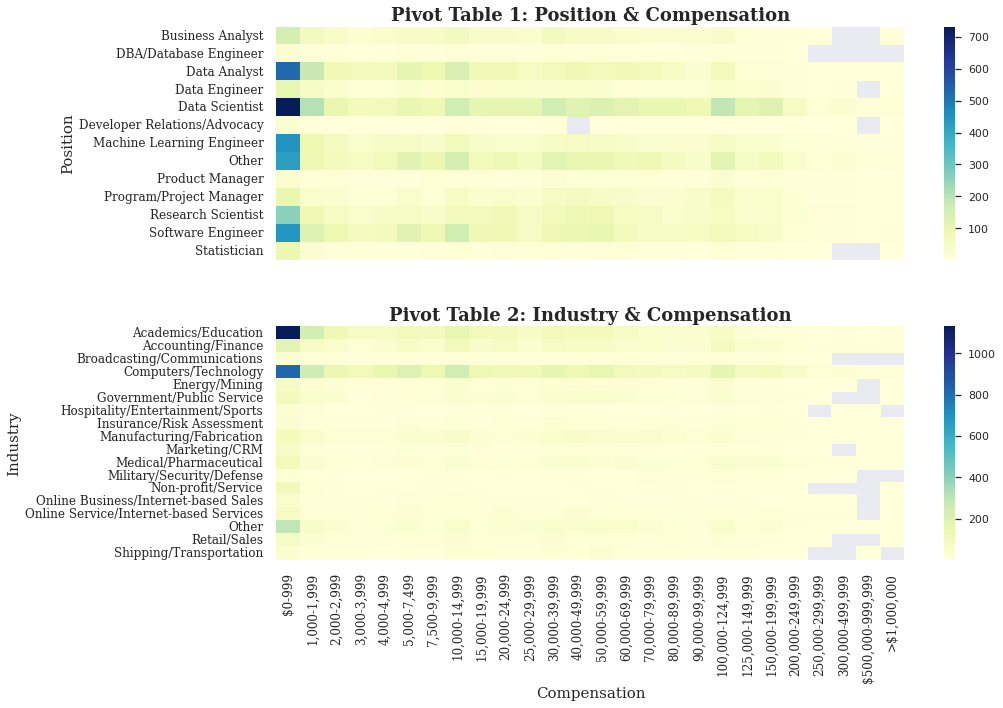

In [77]:
table1 = df.groupby(['Q5', 'Q25']).size().reset_index().pivot(columns='Q25', index='Q5', values=0)[q25_order]
table2 = df.groupby(['Q20', 'Q25']).size().reset_index().pivot(columns='Q25', index='Q20', values=0)[q25_order]

fig, ax =plt.subplots(2,1,figsize = (15,10))

sns.heatmap(table1, cmap = 'YlGnBu', ax=ax[0])
sns.heatmap(table2, cmap = 'YlGnBu', ax=ax[1])

ax[0].set_title('Pivot Table 1: Position & Compensation', fontsize=18, fontweight='bold', fontfamily='serif',)
ax[1].set_title('Pivot Table 2: Industry & Compensation', fontsize=18, fontweight='bold', fontfamily='serif',)

ax[0].set_ylabel('Position',fontsize=15, fontfamily='serif',)
ax[1].set_ylabel('Industry',fontsize=15, fontfamily='serif',)

ax[0].set_xlabel(' ')
ax[1].set_xlabel('Compensation',fontsize=15, fontfamily='serif',)

ax[0].set_xticklabels(' ')
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontfamily='serif', rotation=90, fontsize=12)

ax[0].set_yticklabels(ax[0].get_yticklabels(), fontfamily='serif', fontsize=12)
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontfamily='serif', fontsize=12)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Tìm hiểu mối tương quan giữa các thuộc tính.


**Nhận xét**:
- Pivot Table 1: 
  + Xét về vị trí nghề nghiệp, ta thấy được hầu hết mọi vị trí đều có xu hướng chung là số lượng người giảm dần theo chiều tăng của mức thưởng.
  + Các công việc Data Scientist, Data Analyst, Business Analyst có dãy màu ở giữa đậm hơn so với các công việc khác, có nghĩa là số người ở mức thưởng này nhiều hơn. Đây là những công việc đáng để cân nhắc, ngoài ra còn có Software Engineer theo sau 3 vị trí trên.


- Pivpt Table 2:
  + Xét về lĩnh vực hoạt động, các lĩnh vực hoạt động chính của mọi người là Academics/Education, Computers/Technology, Accounting/Finance.
  + Ngoài ra mức thưởng của các nhóm người này cũng khá cao đặc biệt là Computers/Technology, dãy màu ở giữa tương ứng với mức lương khá cao có màu đậm hơn hẳn.



#### Q4 & Q5 & Q7 <a name="q4q5q7">

In [78]:
df_7_julia = df[df['Q7_Part_8']=='Julia']
df_7_swift = df[df['Q7_Part_9']=='Swift']
df_7_ = df_7_julia.append(df_7_swift)
df_7_5 = df_7_['Q5'].value_counts(sort=False).to_frame()
df_7_4 = df_7_['Q4'].value_counts(sort=False)[q4_order].to_frame()
ques7 = df[['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
            'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10','Q7_Part_11','Q7_Part_12', 'Q7_OTHER']]
ques7.columns = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
df_7 = ques7.count().to_frame()
df_4 = df['Q4'].value_counts(sort=False)[q4_order].to_frame()
degree_4 = df_4.index.to_list()
degree_4[2] = 'Not earn degree'
degree_7_4 = df_7_4.index.to_list()
degree_7_4[2] = 'Not earn degree'

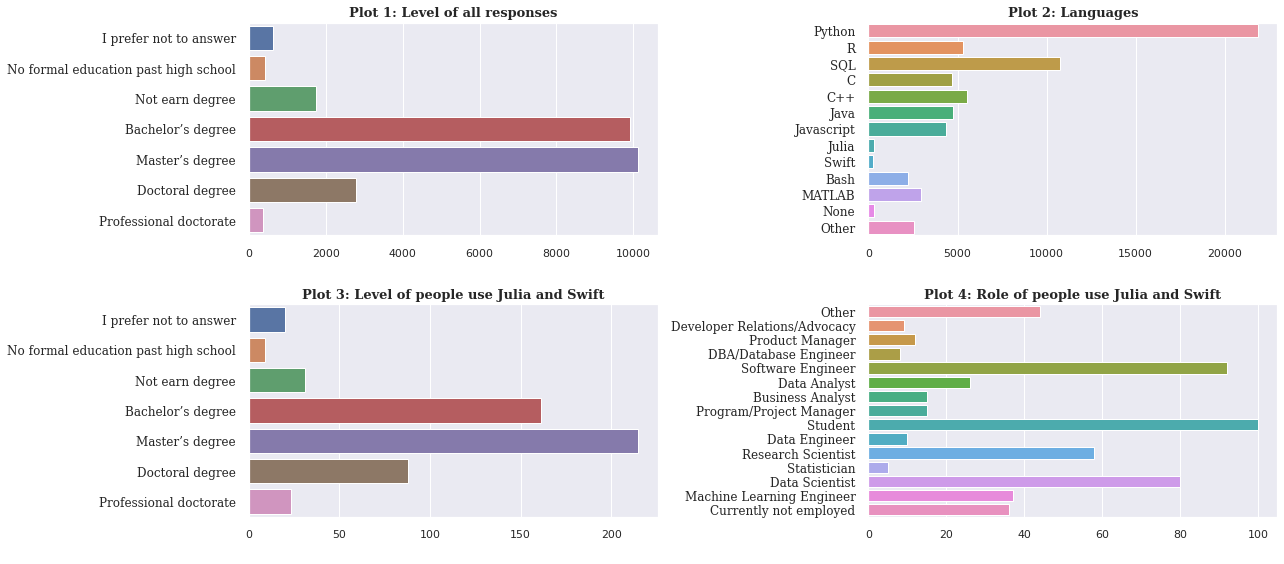

In [79]:
fig, ax =plt.subplots(2,2,figsize = (18,8))

sns.barplot(ax = ax[0,0], y = degree_4, x = df_4['Q4'])
sns.barplot(ax = ax[0,1], y = df_7.index, x = df_7[0])
sns.barplot(ax = ax[1,0], y = degree_7_4, x = df_7_4['Q4'])
sns.barplot(ax = ax[1,1], y = df_7_5.index, x = df_7_5['Q5'])

ax[0,0].set_title('Plot 1: Level of all responses', fontsize=13, fontweight='bold', fontfamily='serif',)
ax[0,1].set_title('Plot 2: Languages', fontsize=13, fontweight='bold', fontfamily='serif',)
ax[1,0].set_title('Plot 3: Level of people use Julia and Swift', fontsize=13, fontweight='bold', fontfamily='serif',)
ax[1,1].set_title('Plot 4: Role of people use Julia and Swift', fontsize=13, fontweight='bold', fontfamily='serif',)

ax[0,0].set_xlabel(' ')
ax[0,1].set_xlabel(' ')
ax[1,0].set_xlabel(' ')
ax[1,1].set_xlabel(' ')

ax[0,0].set_yticklabels(ax[0,0].get_yticklabels(), fontfamily='serif', fontsize=12)
ax[0,1].set_yticklabels(ax[0,1].get_yticklabels(), fontfamily='serif', fontsize=12)
ax[1,0].set_yticklabels(ax[1,0].get_yticklabels(), fontfamily='serif', fontsize=12)
ax[1,1].set_yticklabels(ax[1,1].get_yticklabels(), fontfamily='serif', fontsize=12)

fig.tight_layout()
clear_output()
plt.show()

**Nguyên nhân**:
- Để tìm câu trả lời cho các giả thuyết đã đặt ra ở [Q7](#q7)


**Nhận xét**:

- Biểu đồ thứ 4 cho thấy các nghề liên quan đến ML&DS như Data Scientist, Machine Learning, Data Analysis… vẫn sử dụng không ít, chưa thể tin giả thuyết (i).
- Biểu đồ thứ 1 và 3 cho thấy tỷ lệ Master’s degree/Bachelor’s degree đã tăng từ ~1/1 ở tổng thể lên ~4/3 ở với người dùng Julia, Swift; tương tự với Doctoral degree cũng từ ~1/5 lên ~1/2; vậy có thể cho rằng giả thuyết (ii) đáng tin hơn so với giả thuyết (i).

# References

**Note**: Chỉ tham khảo cách vẽ biểu đồ sau khi đã có ý tưởng EDA.

https://www.kaggle.com/ahmedatta/who-said-data-science-is-boring

https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis

https://www.kaggle.com/orhankaramancode/interactive-visualization-of-ds-community-in-2020

https://www.kaggle.com/ankitkalauni/kaggle-ml-ds-2021-survey-q-answer-plots


